In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab as pl

import colombia_weather
import prepare

In [2]:
df = prepare.get_prepped()

### Data Dictionary
1. region: Coffee producing region in Colombia (top 13 regions)
2. mean_precip: mean precipitation in Colombia (cm)
3. mean_temp: average temperature in Colombia region (degrees F)
4. min_temp: minimum temperature (degrees F)
5. max_temp: maximum temperature (degrees F)
6. price: export price of excelso coffee USD per lb
7. quanity: thousands of 60kg bags of coffee exported 
8. inflated: export price adjusted for inflation in 2018 dollars  

In [3]:
df.head()

quantity  price    inflated  Caldas_mean_precip  Caldas_mean_temp  \
date                                                                            
1960-01-01     782.0  45.68  387.519181            0.040000         72.500000   
1960-02-01     449.0  45.95  389.809684            0.040000         72.210526   
1960-03-01     266.0  45.10  382.598841            0.143158         71.875000   
1960-04-01     264.0  45.20  383.447176            0.525000         72.687500   
1960-05-01     602.0  44.73  379.460004            0.191000         72.181818   

            Caldas_min_temp  Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                                            
1960-01-01        53.446162                  0.280000               58.250000   
1960-02-01        54.300065                  0.082857               58.894737   
1960-03-01        54.741925                  0.124545               58.347826   
1960-04-01        55.906027                  0.113750               59.687500   
1960-05-01        55.326548                  0.276555               59.458333   

            Cundinamarca_min_temp  Narino_mean_precip  ...  Tolima_min_temp  \
date                                                   ...                    
1960-01-01              30.875838            0.072655  ...        62.826583   
1960-02-01              31.438934            0.015172  ...        64.635809   
1960-03-01              34.199076            0.012903  ...        66.368796   
1960-04-01              38.081443            0.008000  ...        67.912503   
1960-05-01              38.367067            0.016774  ...        67.875379   

            Valle_mean_precip  Valle_mean_temp  Valle_min_temp  \
date                                                             
1960-01-01          -0.054432        83.394728       72.399317   
1960-02-01           0.021487        83.592275       72.199709   
1960-03-01           0.061226        83.154188       73.557848   
1960-04-01           0.204186        82.330770       71.204803   
1960-05-01           0.195359        81.782540       70.861052   

            Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
date                                                             
1960-01-01           0.119673        85.574639       74.166190   
1960-02-01          -0.160911        86.849857       76.056101   
1960-03-01          -0.178350        87.567455       76.982745   
1960-04-01          -0.095321        87.131671       78.062566   
1960-05-01           0.042621        85.752403       78.742579   

            Santander_mean_precip  Santander_mean_temp  Santander_min_temp  
date                                                                        
1960-01-01               0.111732            69.105673           59.956370  
1960-02-01               0.167760            69.504415           60.659367  
1960-03-01               0.154044            69.713106           61.178475  
1960-04-01               0.203308            69.024617           61.300378  
1960-05-01               0.150532            69.160477           60.614402  

[5 rows x 42 columns]

In [4]:
df.shape

(708, 42)

In [5]:
df.describe()

quantity       price     inflated  Caldas_mean_precip  \
count   708.000000  708.000000   708.000000          708.000000   
mean    888.759887  117.042459   287.522823            0.205316   
std     381.462823   60.337486   161.812973            0.194527   
min     127.000000   37.270000    79.446600            0.000000   
25%     620.750000   62.390000   165.116364            0.117473   
50%     830.500000  122.592833   287.605531            0.189282   
75%    1096.500000  150.430000   356.107896            0.248600   
max    2755.000000  319.670000  1324.610143            2.550000   

       Caldas_mean_temp  Caldas_min_temp  Cundinamarca_mean_precip  \
count        708.000000       708.000000                708.000000   
mean          73.056972        59.601523                  0.111022   
std            1.878465         3.126061                  0.130392   
min           67.633333        41.000000                  0.000000   
25%           71.734127        58.477283                  0.052315   
50%           73.000000        60.171341                  0.091488   
75%           74.130108        61.733187                  0.142182   
max           81.000000        69.000000                  1.996667   

       Cundinamarca_mean_temp  Cundinamarca_min_temp  Narino_mean_precip  ...  \
count              708.000000             708.000000          708.000000  ...   
mean                55.799535              36.948408            0.168615  ...   
std                  1.238506               4.892166            0.208815  ...   
min                 52.096774              20.000000            0.000000  ...   
25%                 54.967742              34.000000            0.057231  ...   
50%                 55.741935              37.000000            0.136231  ...   
75%                 56.612903              40.000000            0.216435  ...   
max                 59.935484              50.000000            2.775000  ...   

       Tolima_min_temp  Valle_mean_precip  Valle_mean_temp  Valle_min_temp  \
count       708.000000         708.000000       708.000000      708.000000   
mean         68.711412           0.303984        82.500963       70.799932   
std           3.293696           0.226430         1.544705        3.481000   
min          50.000000          -0.054432        76.500000       52.000000   
25%          67.010908           0.144649        81.571429       70.000000   
50%          69.168936           0.276590        82.468180       71.550107   
75%          71.000000           0.413215        83.355415       72.000000   
max          75.000000           1.711429        87.714286       77.000000   

       Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
count         708.000000       708.000000      708.000000   
mean            0.161536        85.741351       72.637999   
std             0.233844         1.780971        2.427677   
min            -0.178350        80.000000       63.000000   
25%             0.018400        84.596552       71.400667   
50%             0.123731        85.835993       72.843232   
75%             0.242173        86.963174       74.000000   
max             3.160000        91.000000       79.000000   

       Santander_mean_precip  Santander_mean_temp  Santander_min_temp  
count             708.000000           708.000000          708.000000  
mean                0.143983            71.144774           62.385355  
std                 0.198461             1.348889            2.002072  
min                 0.000000            66.000000           50.000000  
25%                 0.074420            70.168146           61.260518  
50%                 0.126492            71.100750           63.000000  
75%                 0.167565            71.965150           63.813985  
max                 4.620000            76.000000           68.000000  

[8 rows x 42 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 1960-01-01 to 2018-12-01
Data columns (total 42 columns):
quantity                    708 non-null float64
price                       708 non-null float64
inflated                    708 non-null float64
Caldas_mean_precip          708 non-null float64
Caldas_mean_temp            708 non-null float64
Caldas_min_temp             708 non-null float64
Cundinamarca_mean_precip    708 non-null float64
Cundinamarca_mean_temp      708 non-null float64
Cundinamarca_min_temp       708 non-null float64
Narino_mean_precip          708 non-null float64
Narino_mean_temp            708 non-null float64
Narino_min_temp             708 non-null float64
Cauca_mean_precip           708 non-null float64
Cauca_mean_temp             708 non-null float64
Cauca_min_temp              708 non-null float64
Risaralda_mean_precip       708 non-null float64
Risaralda_mean_temp         708 non-null float64
Risaralda_min_temp          708 non-null fl

In [212]:
pd.plotting.register_matplotlib_converters()

### *Hypothesis: Day-to-day weather does not influence coffee prices, but unusual weather events have a great impact on prices.*

To Do:
- Look at each region independently vs price
- Look at each weather feature vs price 
- Look at the delta in temp compared to price (max vs min)
- Look at quantity vs price 
- Look at extreme events to label
- Possible statistical tests

#### Understand Price - Target 

In [7]:
# Price
pmax = df.price.max()
pmin = df.price.min()
pmean = round(df.price.mean(), 2)

print(f'The max price we have is: ${pmax}')
print(f'The min price we have for coffee is: ${pmin}')
print(f'The overall average price for coffee is: ${pmean}')

The max price we have is: $319.67
The min price we have for coffee is: $37.27
The overall average price for coffee is: $117.04


In [8]:
# Inflated price
pmax = round(df.inflated.max(), 2)
pmin = round(df.inflated.min(), 2)
pmean = round(df.inflated.mean(), 2)

print(f'The max inflated price we have is: ${pmax}')
print(f'The min inflated price we have for coffee is: ${pmin}')
print(f'The overall average inflated price for coffee is: ${pmean}')

The max inflated price we have is: $1324.61
The min inflated price we have for coffee is: $79.45
The overall average inflated price for coffee is: $287.52


In [9]:
quantity = round(df.quantity.mean(), 2)

print(f'The average quantity of coffee exported is: {quantity}')

The average quantity of coffee exported is: 888.76


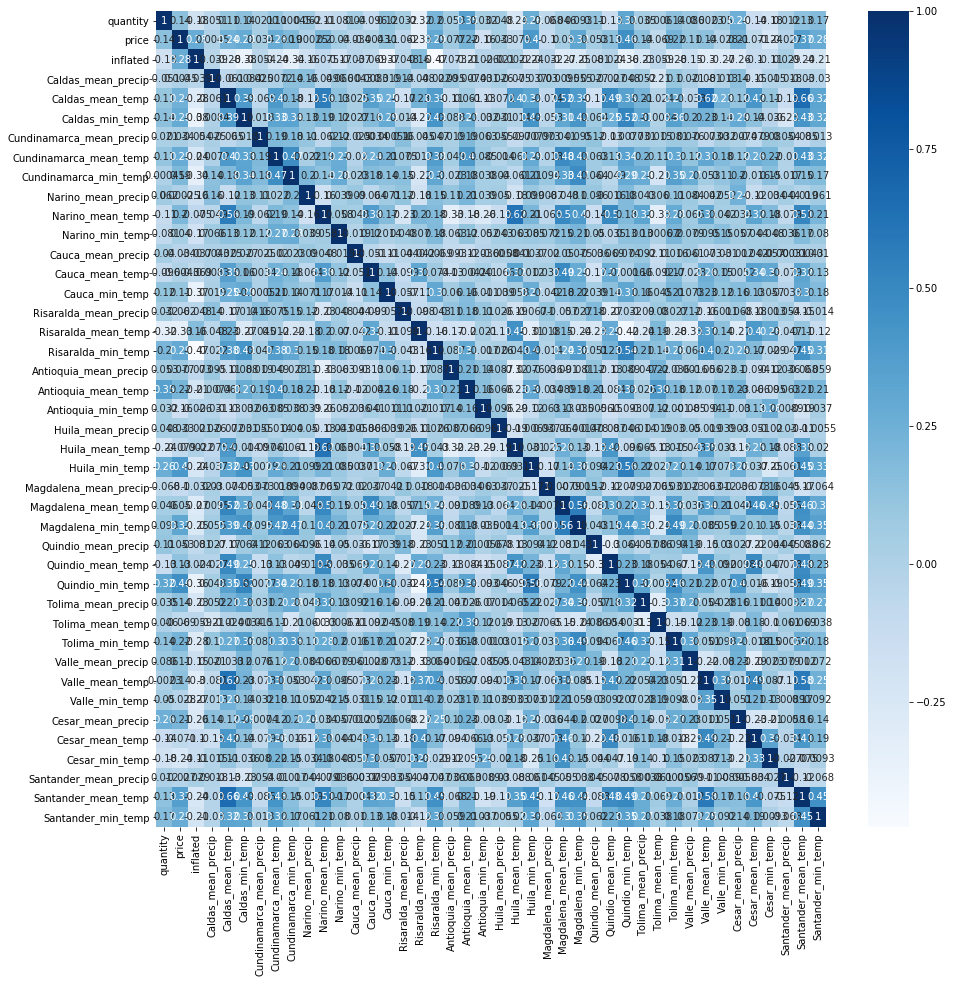

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()
# insane

What does the price distribution look like throughout the years of data obtained?

In [11]:
import pylab as pl

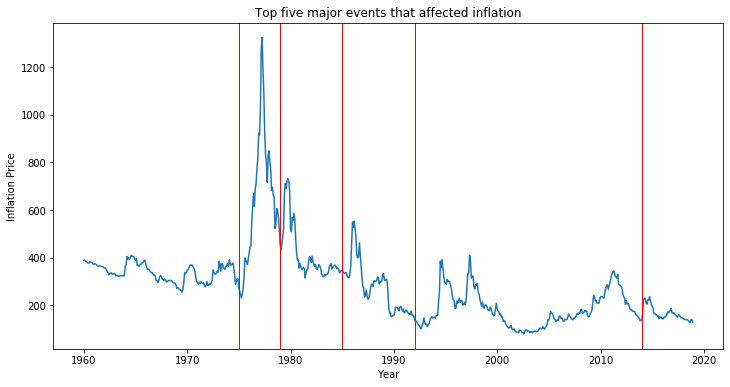

In [96]:
# ax = plt.axes()
plt.figure(figsize=(12,6))
plt.plot(df.inflated)
date_ = '1975'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='red')
datetime = '1979'
plt.axvline(pd.to_datetime(datetime), linewidth=1, color='red')
date = '1985'
plt.axvline(pd.to_datetime(date), linewidth=1, color='red')
dateevent = '1992'
plt.axvline(pd.to_datetime(dateevent), linewidth=1, color='red')
datet = '2014'
plt.axvline(pd.to_datetime(datet), linewidth=1, color='red')
plt.title('Top five major events that affected inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Price')
# plt.xticks([1975, 1985], ['test', 'test'])
#plt.annotate(1973, 'test')
#plt.text(1975, 1200, 'test')
#ax.arrow(1970, 1200, 1975, 600)
#pl.text(1970, 600, 'test')
plt.show()
# add in annotation to vlines
# add 1997
# 77 78 11 14 94-95, changed focus 12 

In [97]:
def events_over_time():   
    plt.figure(figsize=(12,6))
    plt.plot(df.inflated)
    date_ = '1975'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='red')
    datetime = '1979'
    plt.axvline(pd.to_datetime(datetime), linewidth=1, color='red')
    date = '1985'
    plt.axvline(pd.to_datetime(date), linewidth=1, color='red')
    dateevent = '1992'
    plt.axvline(pd.to_datetime(dateevent), linewidth=1, color='red')
    datet = '2014'
    plt.axvline(pd.to_datetime(datet), linewidth=1, color='red')
    plt.title('Top five major events that affected inflation')
    plt.xlabel('Year')
    plt.ylabel('Inflation Price')
    plt.show()

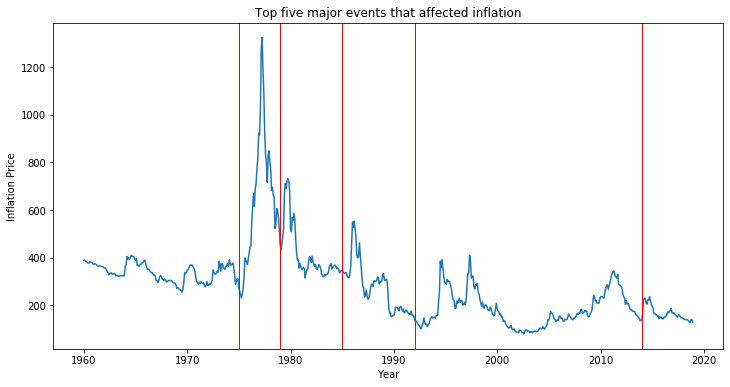

In [98]:
events_over_time()

There are some major spikes in the data around 1976, 1986, 1995, 1998, and 2010
Potential causes of price spikes: look at Colombian history doc to potentially find influences of spikes/dips
1975: Brazilian Frost
1979: Offshore earthquake
1985: massive volcano
1992: massive earthquake
2014: coffee rust outbreak

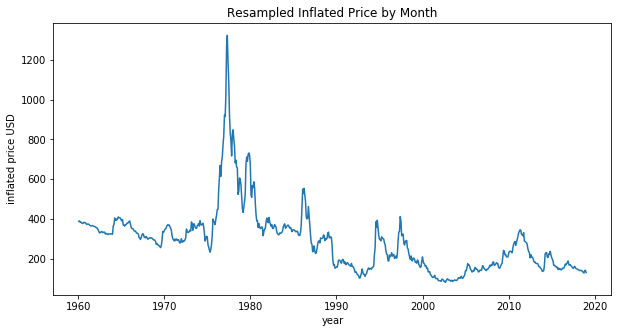

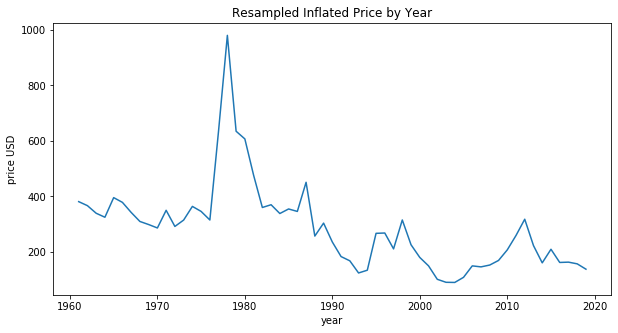

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('M').mean())
plt.title('Resampled Inflated Price by Month')
plt.xlabel('year')
plt.ylabel('inflated price USD')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('Y').mean())
plt.title('Resampled Inflated Price by Year')
plt.xlabel('year')
plt.ylabel('price USD')
plt.show()

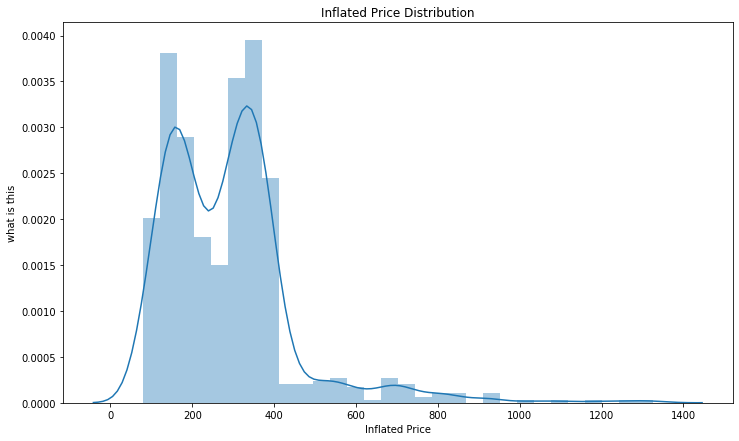

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated)
plt.title('Inflated Price Distribution')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

Our inflation price is bi-modal. Looking at the data over time, it appears to even out after about 1990-ish. I'll look at the data after that point to look at the distribution.

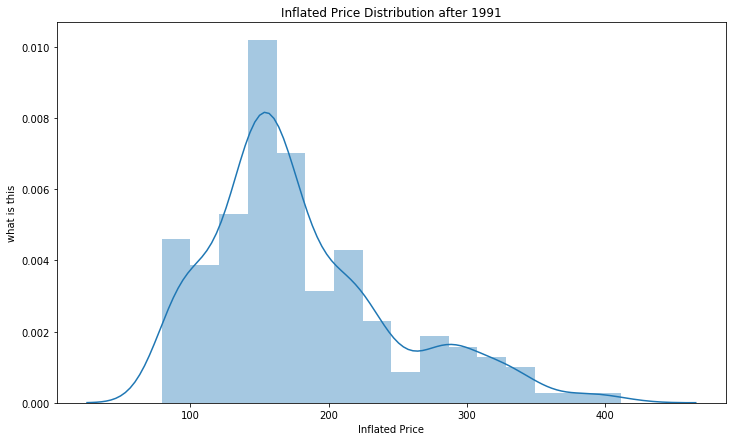

In [16]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated.loc['1991':])
plt.title('Inflated Price Distribution after 1991')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

Since the distribution evens out (tails to the right still but) more so in recent years than with the older data, This could be a good portion of the data to narrow in on.

## Separate out the regions
Look at region specific information

In [17]:
caldas = pd.DataFrame()

caldas['mean_temp'] = df.Caldas_mean_temp
caldas['min_temp'] = df.Caldas_min_temp
caldas['precip'] = df.Caldas_mean_precip
caldas['price'] = df.inflated
caldas['quantity'] = df.quantity

antioquia = pd.DataFrame()

antioquia['precip'] = df.Antioquia_mean_precip
antioquia['mean_temp'] = df.Antioquia_mean_temp
antioquia['min_temp'] = df.Antioquia_min_temp
antioquia['price'] = df.inflated
antioquia['quantity'] = df.quantity

cauca = pd.DataFrame()

cauca['precip'] = df.Cauca_mean_precip
cauca['mean_temp'] = df.Cauca_mean_temp
cauca['min_temp'] = df.Cauca_min_temp
cauca['price'] = df.price
cauca['quantity'] = df.quantity

narino = pd.DataFrame()

narino['precip'] = df.Narino_mean_precip
narino['mean_temp'] = df.Narino_mean_temp
narino['min_temp'] = df.Narino_min_temp
narino['price'] = df.price
narino['quantity'] = df.quantity

valle = pd.DataFrame()

valle['precip'] = df.Valle_mean_precip
valle['mean_temp'] = df.Valle_mean_temp
valle['min_temp'] = df.Valle_min_temp
valle['price'] = df.inflated
valle['quantity'] = df.quantity

cesar = pd.DataFrame()

cesar['precip'] = df.Cesar_mean_precip
cesar['mean_temp'] = df.Cesar_mean_temp
cesar['min_temp'] = df.Cesar_min_temp
cesar['price'] = df.inflated
cesar['quantity'] = df.quantity

tolima = pd.DataFrame()

tolima['precip'] = df.Tolima_mean_precip
tolima['mean_temp'] = df.Tolima_mean_temp
tolima['min_temp'] = df.Tolima_min_temp
tolima['price'] = df.inflated
tolima['quantity'] = df.quantity

huila = pd.DataFrame()

huila['precip'] = df.Huila_mean_precip
huila['mean_temp'] = df.Huila_mean_temp
huila['min_temp'] = df.Huila_min_temp
huila['price'] = df.inflated
huila['quantity'] = df.quantity

santander = pd.DataFrame()

santander['precip'] = df.Santander_mean_precip
santander['mean_temp'] = df.Santander_mean_temp
santander['min_temp'] = df.Santander_min_temp
santander['price'] = df.inflated
santander['quantity'] = df.quantity

magdalena = pd.DataFrame()

magdalena['precip'] = df.Magdalena_mean_precip
magdalena['mean_temp'] = df.Magdalena_mean_temp
magdalena['min_temp'] = df.Magdalena_min_temp
magdalena['price'] = df.inflated
magdalena['quantity'] = df.quantity

quindio = pd.DataFrame()

quindio['precip'] = df.Quindio_mean_precip
quindio['mean_temp'] = df.Quindio_mean_temp
quindio['min_temp'] = df.Quindio_min_temp
quindio['price'] = df.inflated
quindio['quantity'] = df.quantity

risaralda = pd.DataFrame()

risaralda['precip'] = df.Risaralda_mean_precip
risaralda['mean_temp'] = df.Risaralda_mean_temp
risaralda['min_temp'] = df.Risaralda_min_temp
risaralda['price'] = df.inflated
risaralda['quantity'] = df.quantity

cundinamarca = pd.DataFrame()

cundinamarca['precip'] = df.Cundinamarca_mean_precip
cundinamarca['mean_temp'] = df.Cundinamarca_mean_temp
cundinamarca['min_temp'] = df.Cundinamarca_min_temp
cundinamarca['price'] = df.inflated
cundinamarca['quantity'] = df.quantity

#### testing out code

In [146]:
region = [df.Caldas_mean_temp, df.Antioquia_mean_temp, df.Cauca_mean_temp, df.Narino_mean_temp, df.Valle_mean_temp,
         df.Cesar_mean_temp, df.Tolima_mean_temp, df.Huila_mean_temp, df.Santander_mean_temp, df.Magdalena_mean_temp, 
         df.Quindio_mean_temp, df.Risaralda_mean_temp, df.Cundinamarca_mean_temp]

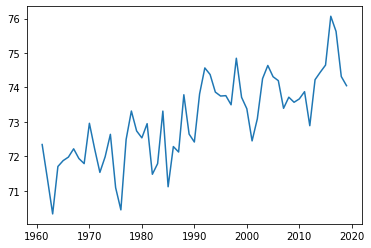

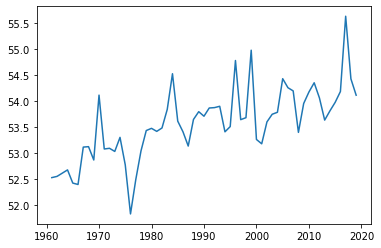

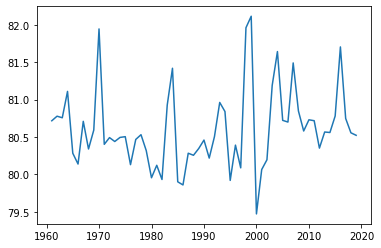

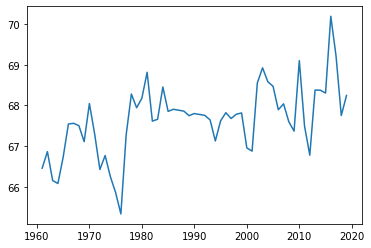

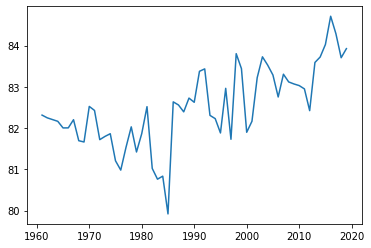

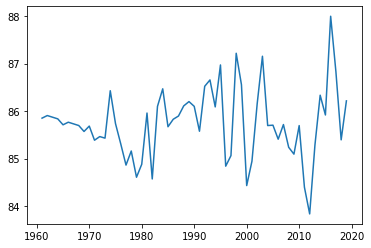

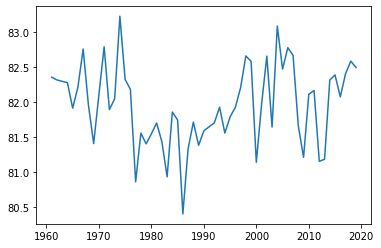

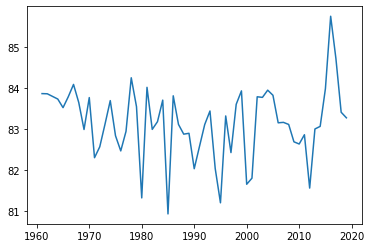

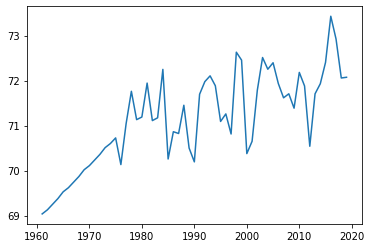

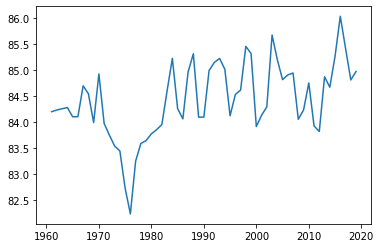

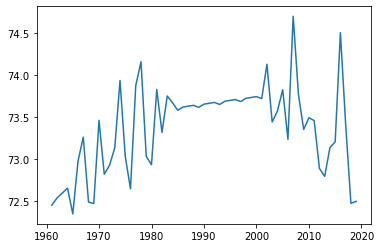

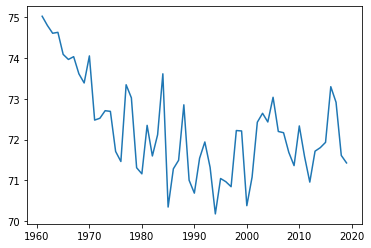

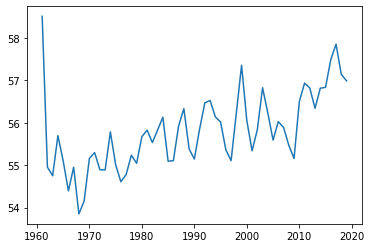

In [216]:
for col in region:
    plt.plot(col.resample("Y").mean())
    plt.show()

### Caldas: Cental Region

In [19]:
precip = round(caldas.precip.mean(), 2)
temp = round(caldas.mean_temp.mean(), 2)
maxtemp = round(caldas.mean_temp.max(), 2)
mintemp = round(caldas.min_temp.mean(), 2)
price = round(caldas.price.mean(), 2)
quantity = round(caldas.quantity.mean(), 2)

print(f'The average precipitation in Caldas is: {precip} cm.')
print(f'The average temperature in Caldas is: {temp} F.')
print(f'The maximum temperature in Caldas (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Caldas is: {mintemp} F.')
print(f'The average inflated price in Caldas is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Caldas is: 0.21 cm.
The average temperature in Caldas is: 73.06 F.
The maximum temperature in Caldas (based on average temp) is: 81.0 F.
The minimum temperature in Caldas is: 59.6 F.
The average inflated price in Caldas is: 287.52 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


#### Do any weather elements in this region correlate largely with price?

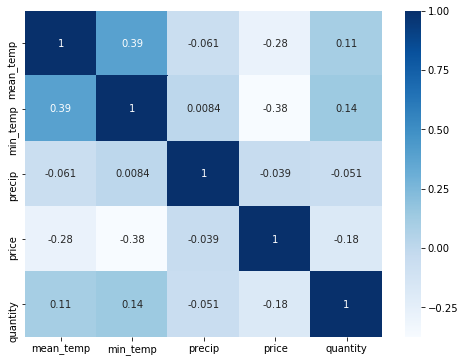

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(caldas.corr(), cmap='Blues', annot=True)
plt.show()

In [21]:
caldas.corr()
# no strong correlation

mean_temp  min_temp    precip     price  quantity
mean_temp   1.000000  0.392211 -0.060994 -0.280974  0.105027
min_temp    0.392211  1.000000  0.008449 -0.375244  0.143549
precip     -0.060994  0.008449  1.000000 -0.039081 -0.050503
price      -0.280974 -0.375244 -0.039081  1.000000 -0.177711
quantity    0.105027  0.143549 -0.050503 -0.177711  1.000000

#### Distributions of Caldas features over time

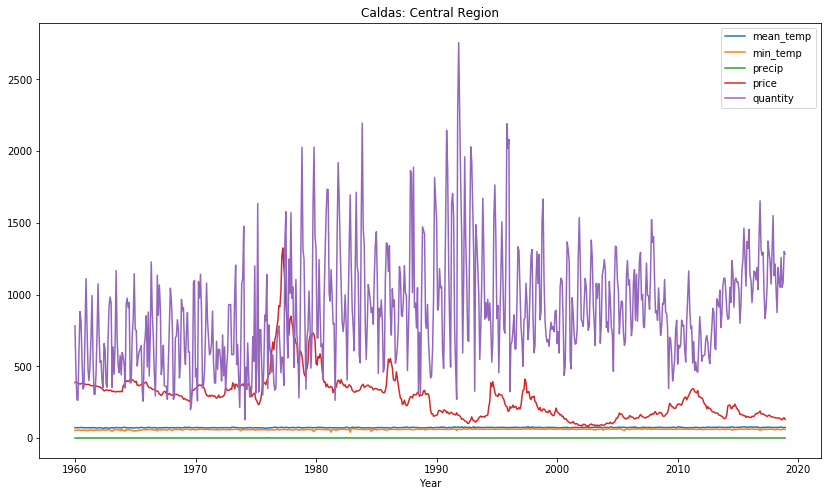

In [22]:
plt.figure(figsize=(14,8))
plt.plot(caldas)
plt.legend(caldas.columns)
plt.title('Caldas: Central Region')
plt.xlabel('Year')
plt.show()

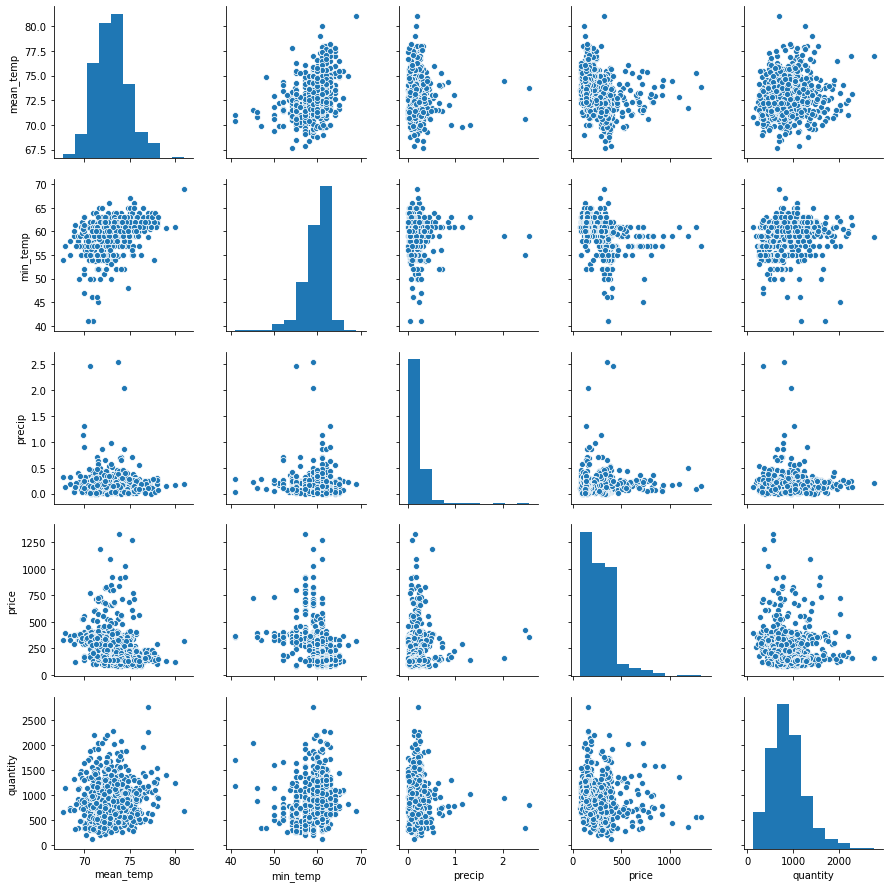

In [23]:
sns.pairplot(caldas)
plt.show()

#### Are there any major changes in temperature over time?

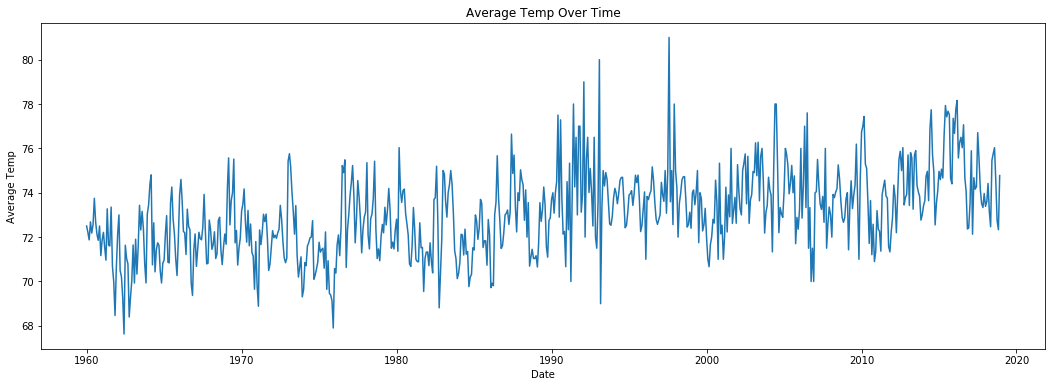

In [24]:
plt.figure(figsize=(18,6))
sns.lineplot(caldas.index, caldas.mean_temp)
plt.title('Average Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temp')
plt.show()

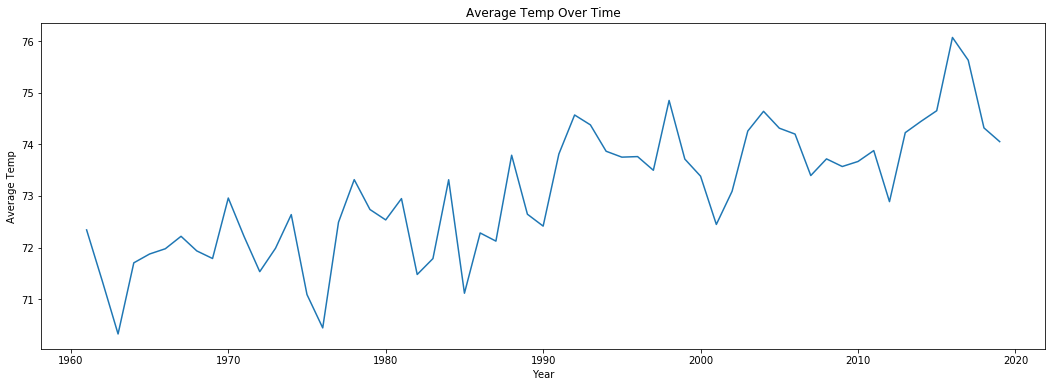

In [25]:
plt.figure(figsize=(18,6))
plt.plot(caldas.mean_temp.resample('Y').mean())
plt.title('Average Temp Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.show()

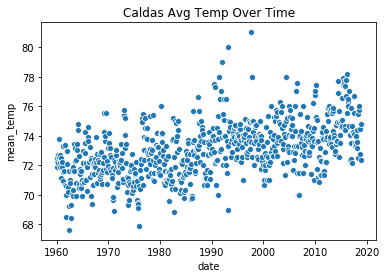

In [258]:
sns.scatterplot(caldas.index, caldas.mean_temp)
plt.title('Caldas Avg Temp Over Time')
plt.show()

- Takeaways: The average temperatures here are subtly rising, with an average time high around 2016. The data is in a general positive upward trend.
- To Do: Look into any recorded weather phenomena around that year that might have affected coffee production

#### How does the minimum temperature change over time?

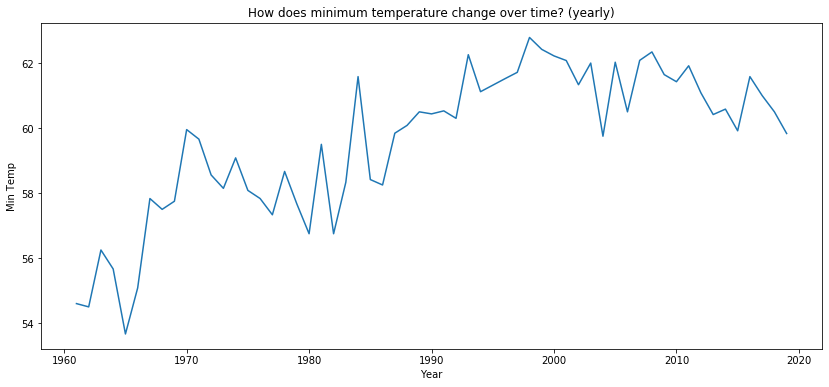

In [26]:
plt.figure(figsize=(14,6))
plt.plot(caldas.min_temp.resample('Y').mean())
plt.title('How does minimum temperature change over time? (yearly)')
plt.xlabel('Year')
plt.ylabel('Min Temp')
plt.show()

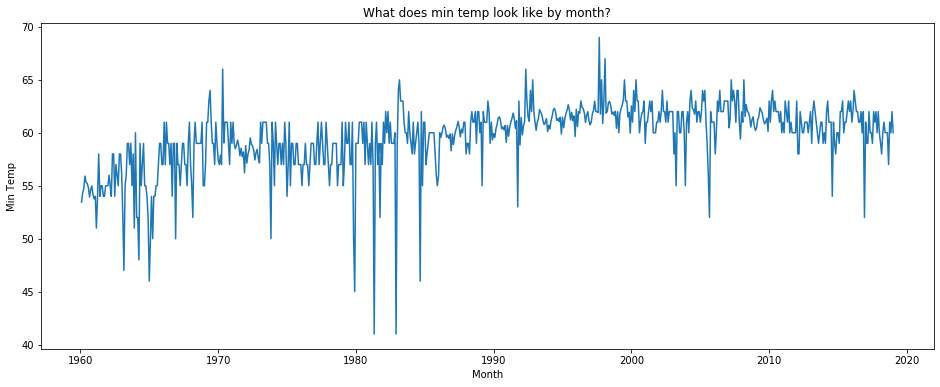

In [27]:
plt.figure(figsize=(16,6))
plt.plot(caldas.min_temp.resample('M').mean())
plt.title('What does min temp look like by month?')
plt.xlabel('Month')
plt.ylabel('Min Temp')
plt.show()

- Takeaways: There are a few major dips in the data, especially in the 1980's. For the most part, the low temeratures keep a consistant trend with a small hump in the 2000's.
- To Do: Look into possible low temperature events that could have impacted coffee

#### What does the precipitation look like inthis region?

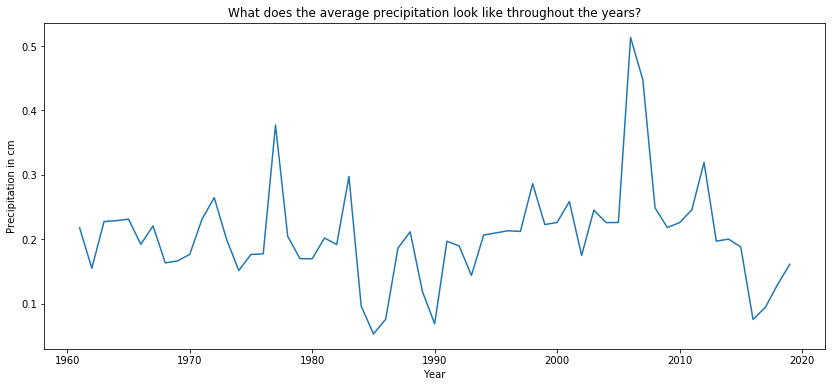

In [29]:
plt.figure(figsize=(14,6))
plt.plot(caldas.precip.resample('Y').mean())
plt.title('What does the average precipitation look like throughout the years?')
plt.xlabel('Year')
plt.ylabel('Precipitation in cm')
plt.show()

- Takeaways: There is high in precipitation around 2009 and a few dips of low precipitation in this area. 
- To Do: Look into this region's weather history to see if there have been any droughts for the area. 

#### Looking at precipitation over time

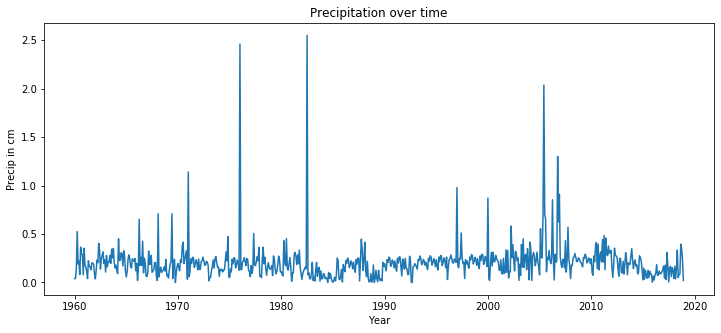

In [30]:
plt.figure(figsize=(12,5))
plt.plot(caldas.precip)
plt.title('Precipitation over time')
plt.xlabel('Year')
plt.ylabel('Precip in cm')
plt.show()

- Takeaways: There are a few huge spikes in the data, especially between around 1975 - 1985. 
- To Do: Look into any anomolous weather patterns during those times.

### Quantity is the same for all regions in our data

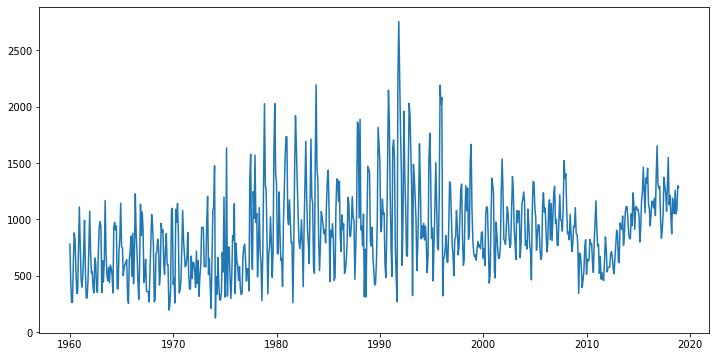

In [31]:
plt.figure(figsize=(12,6))
plt.plot(caldas.quantity)
plt.show()

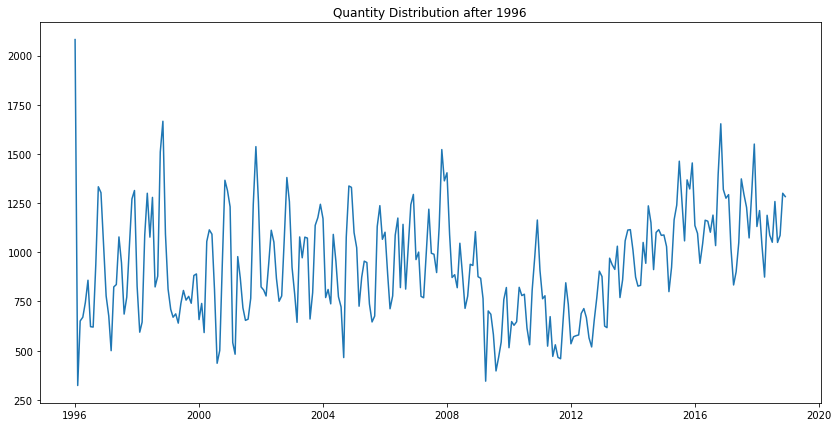

In [32]:
plt.figure(figsize=(14,7))
plt.plot(caldas.quantity.loc['1996':])
plt.title('Quantity Distribution after 1996')
plt.show()

- Takeaways: Quantity smooths out after 1996 compared to the rest of the time. The market probably stabalized in later years after figuring out their need to stockpile coffee.

### Antioquia: Central Zone

In [33]:
precip = round(antioquia.precip.mean(), 2)
temp = round(antioquia.mean_temp.mean(), 2)
maxtemp = round(antioquia.mean_temp.max(), 2)
mintemp = round(antioquia.min_temp.mean(), 2)
price = round(antioquia.price.mean(), 2)
quantity = round(antioquia.quantity.mean(), 2)

print(f'The average precipitation in Antioquia is: {precip} cm.')
print(f'The average temperature in Antioquia is: {temp} F.')
print(f'The maximum temperature in Antioquia (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Antioquia is: {mintemp} F.')
print(f'The average inflated price in Antioquia is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Antioquia is: 0.11 cm.
The average temperature in Antioquia is: 53.57 F.
The maximum temperature in Antioquia (based on average temp) is: 58.81 F.
The minimum temperature in Antioquia is: 37.48 F.
The average inflated price in Antioquia is: 287.52 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


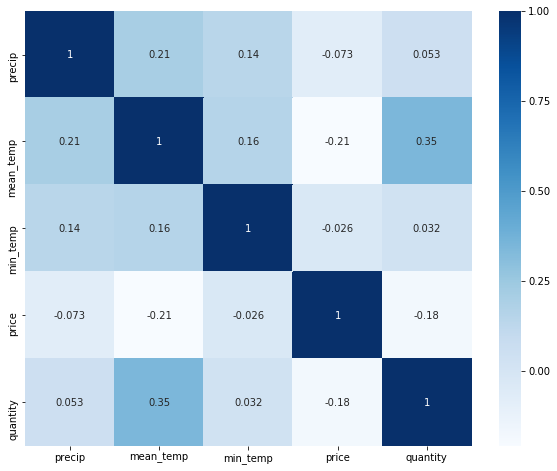

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(antioquia.corr(), annot=True, cmap='Blues')
plt.show()

#### Looking at Antioquia features

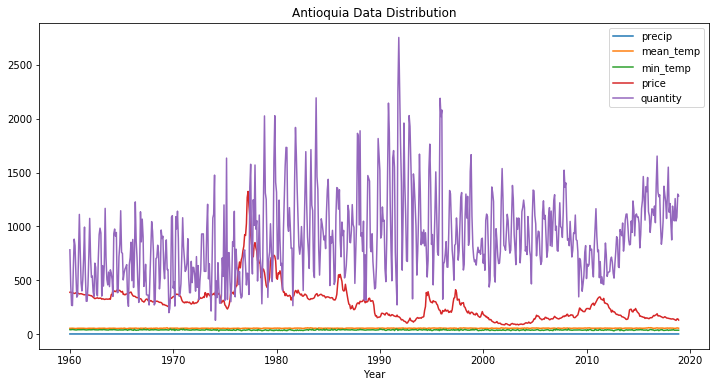

In [35]:
plt.figure(figsize=(12,6))
plt.plot(antioquia)
plt.title('Antioquia Data Distribution')
plt.legend(antioquia.columns)
plt.xlabel('Year')
plt.show()

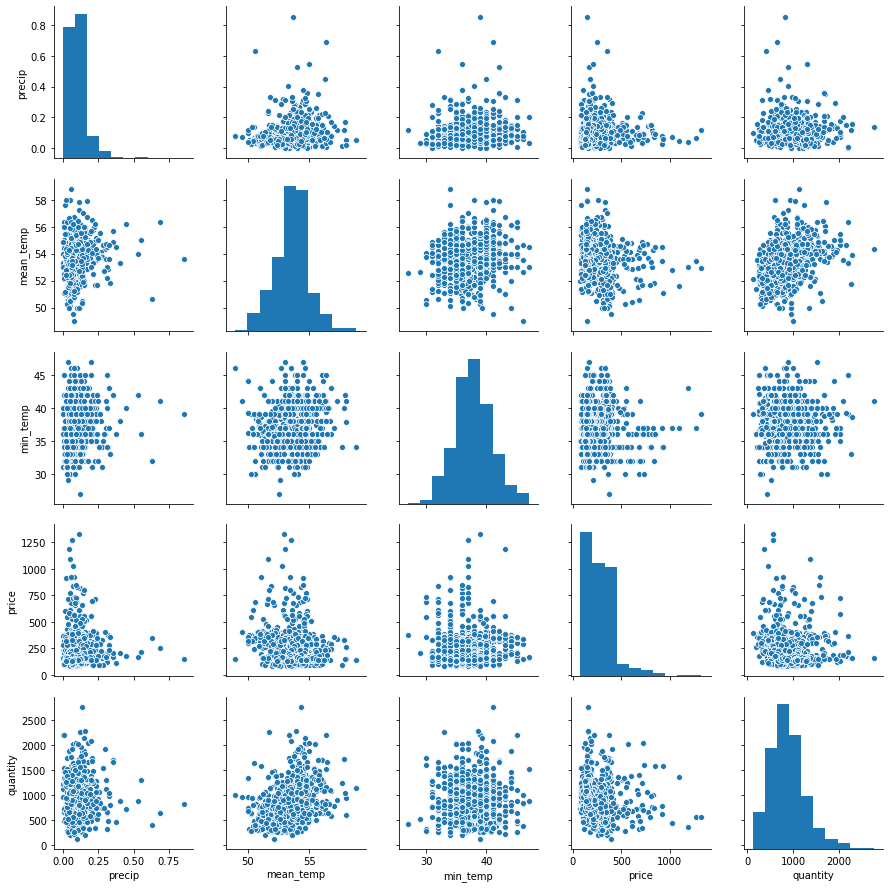

In [36]:
sns.pairplot(antioquia)
plt.show()

#### Distribution of price in Antioquia

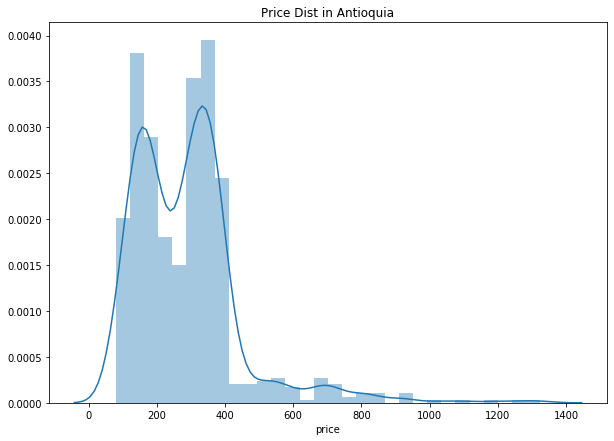

In [37]:
plt.figure(figsize=(10,7))
sns.distplot(antioquia.price)
plt.title('Price Dist in Antioquia')
plt.show()

#### What do the individual feature distributions look like?

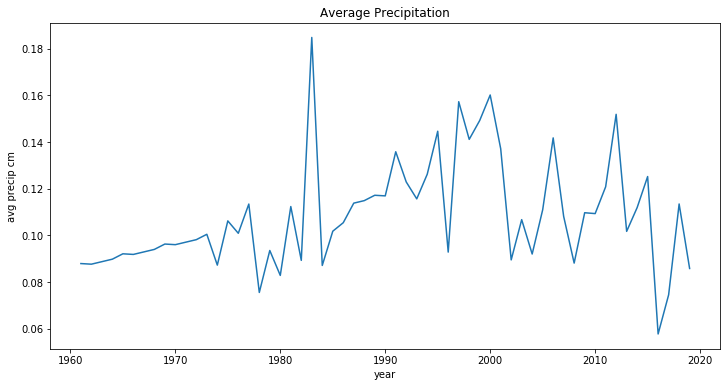

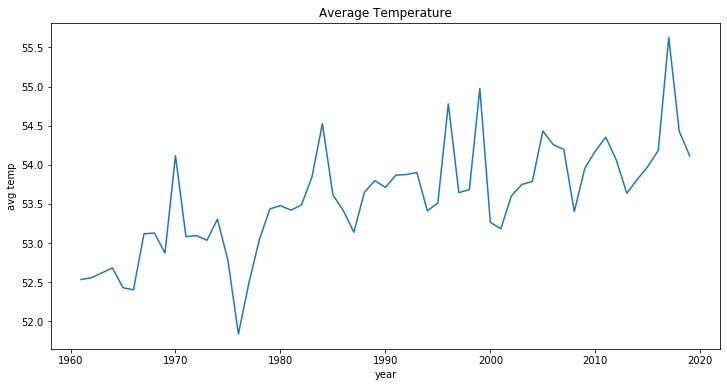

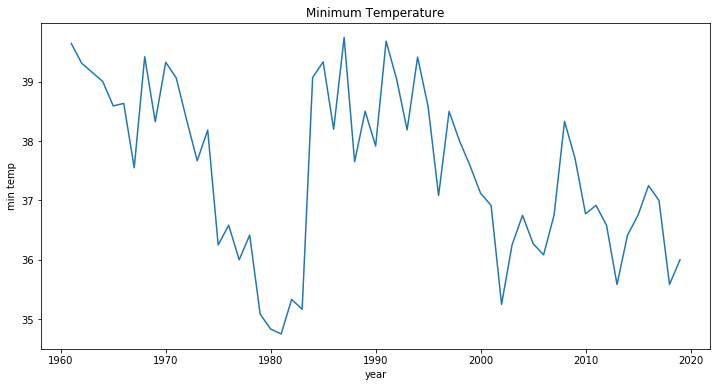

In [38]:
plt.figure(figsize=(12,6))
plt.plot(antioquia.precip.resample('Y').mean())
plt.title('Average Precipitation')
plt.xlabel('year')
plt.ylabel('avg precip cm')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.mean_temp.resample('Y').mean())
plt.title('Average Temperature')
plt.xlabel('year')
plt.ylabel('avg temp')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.min_temp.resample('Y').mean())
plt.title('Minimum Temperature')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

- Takeaways: There are obvious peaks and valleys in the data. The trends follow other regions trends. Nothing significant pops out. 
- To Do: Describe possible causes in the largest peaks and valleys.

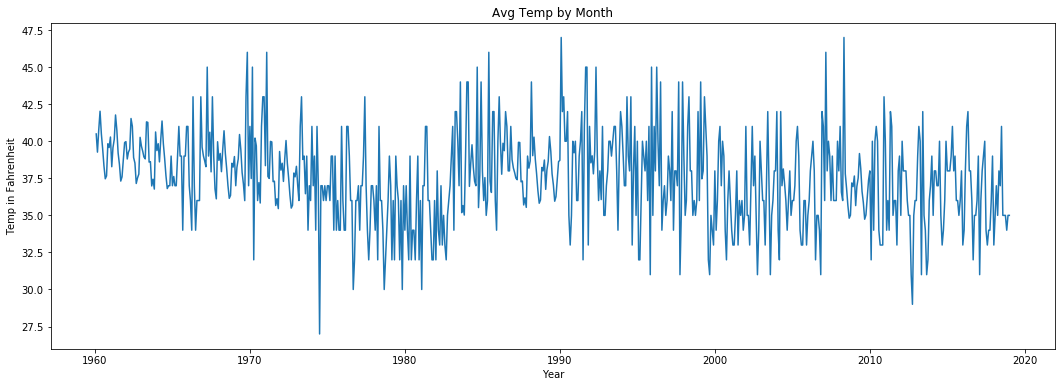

In [40]:
plt.figure(figsize=(18,6))
plt.plot(antioquia.min_temp.resample("M").mean())
plt.title('Avg Temp by Month')
plt.ylabel('Temp in Fahrenheit')
plt.xlabel('Year')
plt.show()

### Cauca: South Zone

In [42]:
precip = round(cauca.precip.mean(), 2)
temp = round(cauca.mean_temp.mean(), 2)
maxtemp = round(cauca.mean_temp.max(), 2)
mintemp = round(cauca.min_temp.mean(), 2)
price = round(cauca.price.mean(), 2)
quantity = round(cauca.quantity.mean(), 2)

print(f'The average precipitation in Cauca is: {precip} cm.')
print(f'The average temperature in Cauca is: {temp} F.')
print(f'The maximum temperature in Cauca (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Cauca is: {mintemp} F.')
print(f'The average inflated price in Cauca is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Cauca is: 0.8 cm.
The average temperature in Cauca is: 80.6 F.
The maximum temperature in Cauca (based on average temp) is: 85.5 F.
The minimum temperature in Cauca is: 71.12 F.
The average inflated price in Cauca is: 117.04 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


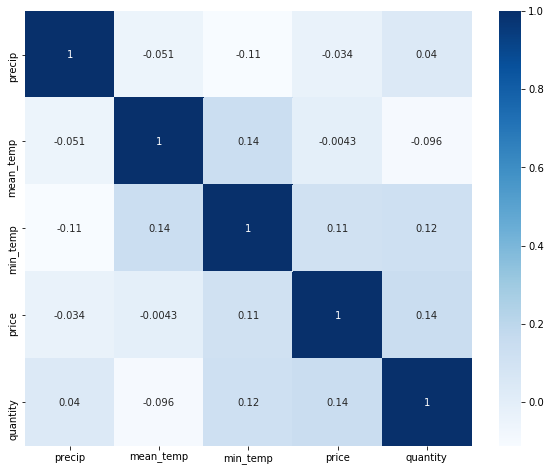

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(cauca.corr(), annot=True, cmap='Blues')
plt.show()

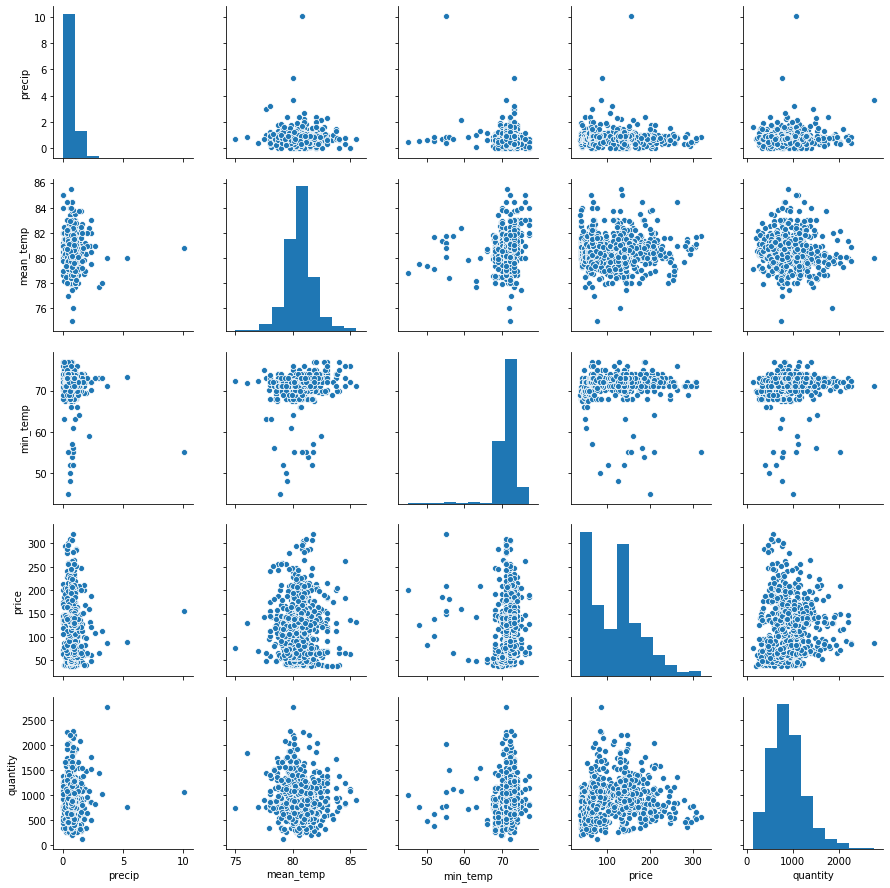

In [44]:
sns.pairplot(cauca)
plt.show()

#### Exploring Features in Cauca

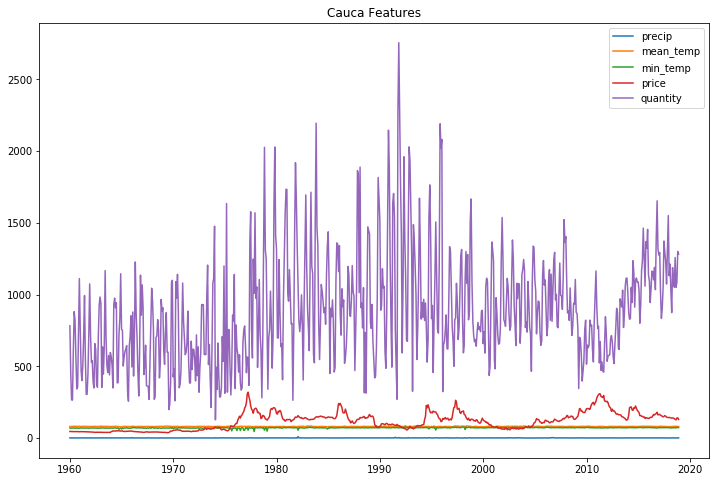

In [45]:
plt.figure(figsize=(12,8))
plt.plot(cauca)
plt.title('Cauca Features')
plt.legend(cauca.columns)
plt.show()
# label features

#### What do weather features look like in this area?

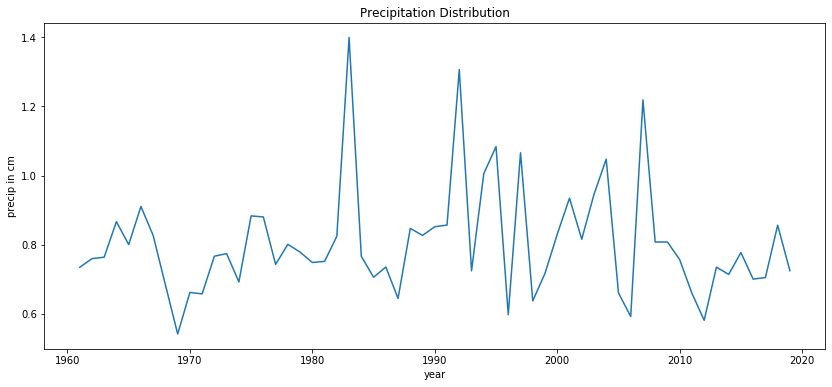

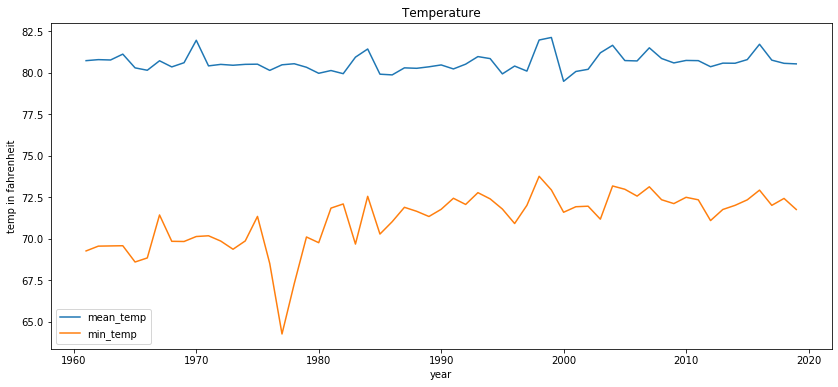

In [46]:
plt.figure(figsize=(14,6))
plt.plot(cauca.precip.resample("Y").mean())
plt.title('Precipitation Distribution')
plt.xlabel('year')
plt.ylabel('precip in cm')
plt.show()
plt.figure(figsize=(14,6))
plt.plot(cauca.mean_temp.resample("Y").mean())
plt.plot(cauca.min_temp.resample("Y").mean())
plt.title('Temperature')
plt.xlabel('year')
plt.ylabel('temp in fahrenheit')
plt.legend(cauca[['mean_temp', 'min_temp']])
plt.show()

- Takeaways: There are no major changes in the data that are out of the ordinary. There are a lot of high spikes in precipitation.
- To Do: Look into the precipitation spikes and temperature dips to see how those events correlate with coffee prices.

### Narino: South Zone

In [48]:
precip = round(narino.precip.mean(), 2)
temp = round(narino.mean_temp.mean(), 2)
maxtemp = round(narino.mean_temp.max(), 2)
mintemp = round(narino.min_temp.mean(), 2)
price = round(narino.price.mean(), 2)
quantity = round(narino.quantity.mean(), 2)

print(f'The average precipitation in Narino is: {precip} cm.')
print(f'The average temperature in Narino is: {temp} F.')
print(f'The maximum temperature in Narino (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Narino is: {mintemp} F.')
print(f'The average inflated price in Narino is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Narino is: 0.17 cm.
The average temperature in Narino is: 67.65 F.
The maximum temperature in Narino (based on average temp) is: 73.33 F.
The minimum temperature in Narino is: 49.32 F.
The average inflated price in Narino is: 117.04 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


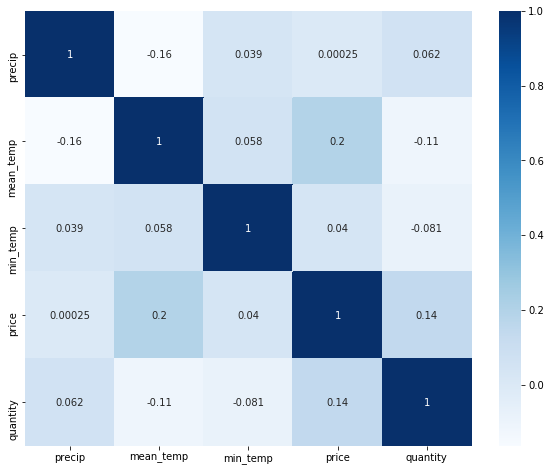

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(narino.corr(), annot=True, cmap='Blues')
plt.show()

#### What do features in Narina look like?

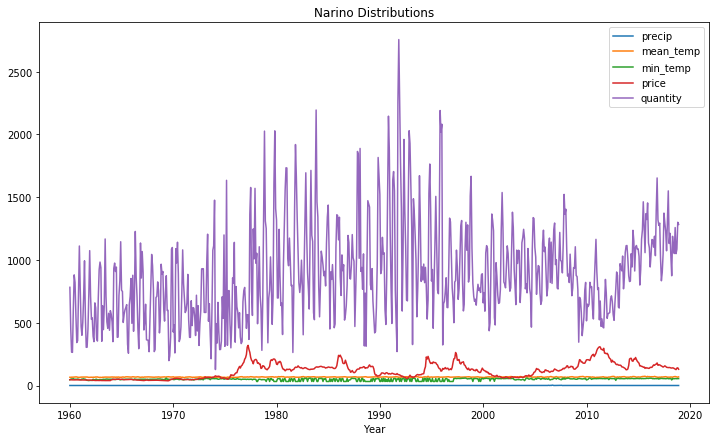

In [50]:
plt.figure(figsize=(12,7))
plt.plot(narino)
plt.title('Narino Distributions')
plt.xlabel('Year')
plt.legend(narino.columns)
plt.show()

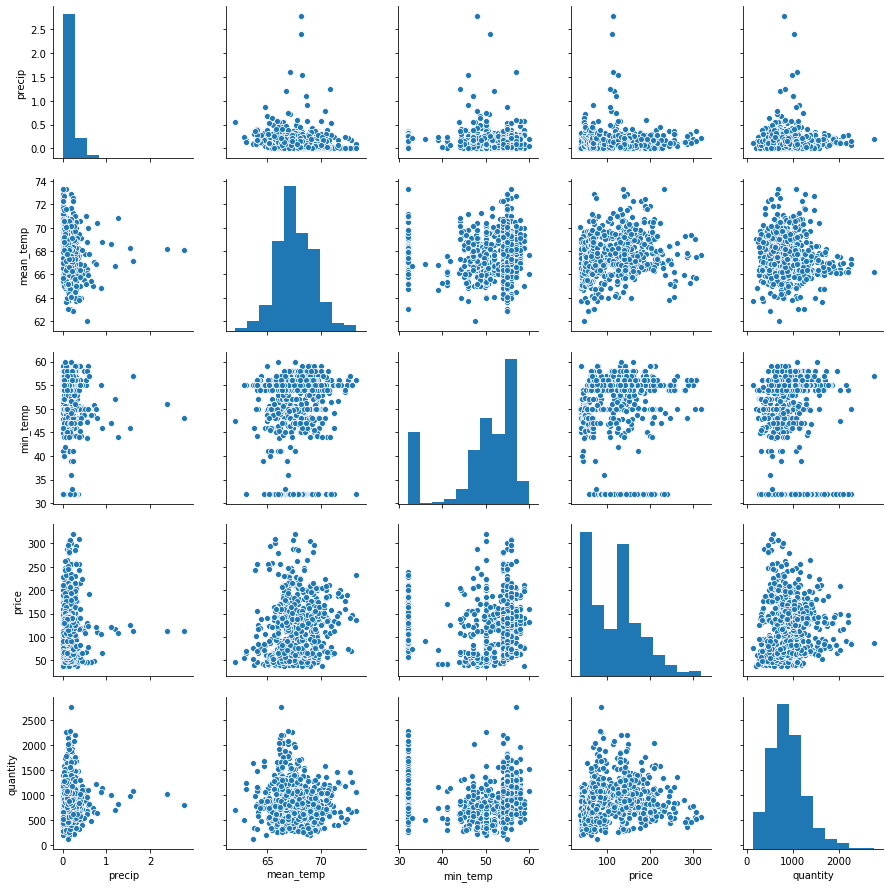

In [51]:
sns.pairplot(narino)
plt.show()

#### What does the distribution of coffee prices in this zone look like?

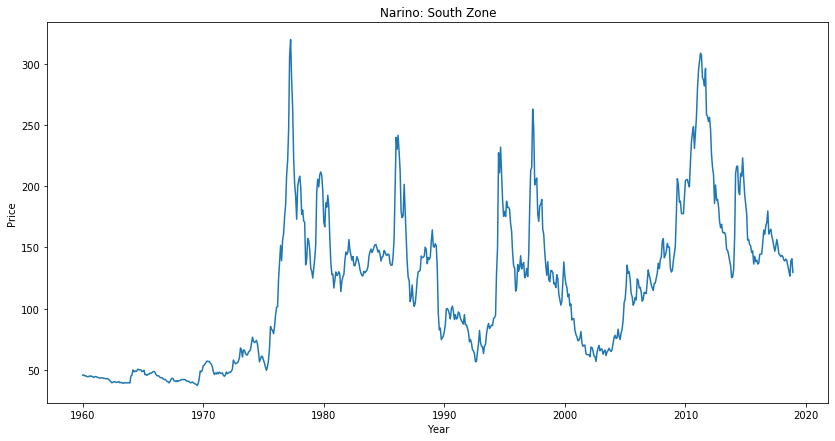

In [52]:
plt.figure(figsize=(14,7))
plt.plot(narino.price)
plt.title('Narino: South Zone')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

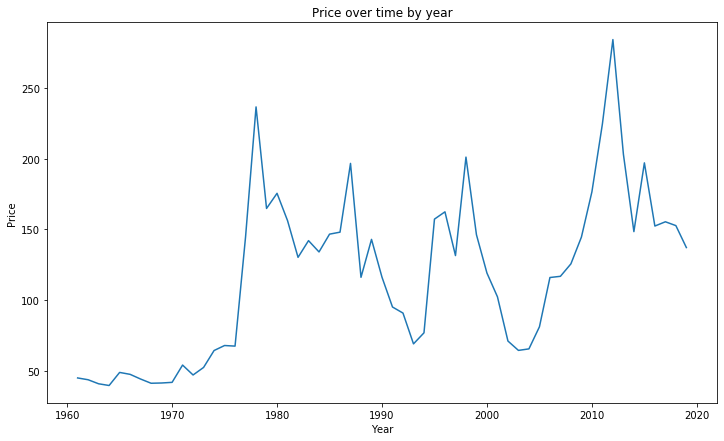

In [53]:
plt.figure(figsize=(12,7))
plt.plot(narino.price.resample('Y').mean())
plt.title('Price over time by year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

- Takeaways: The shape of this region's distribution is similar, if not the same, as other regions.
- To Do: Look at all distributions together to really see any similarities and differences.

#### How does the minimum temperature look over time in this region?

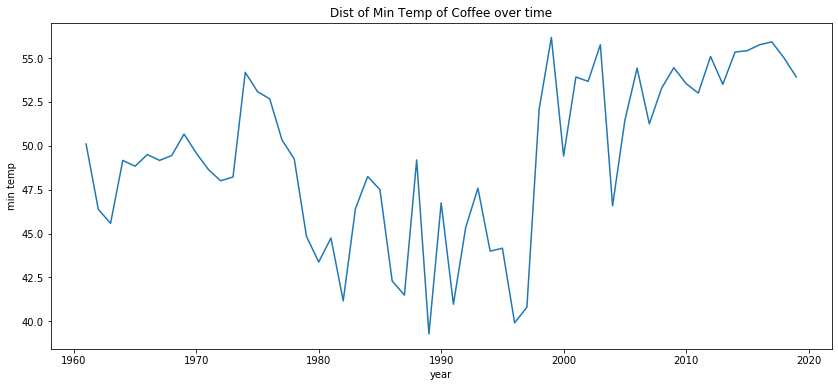

In [54]:
plt.figure(figsize=(14,6))
plt.plot(narino.min_temp.resample('Y').mean())
plt.title('Dist of Min Temp of Coffee over time')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

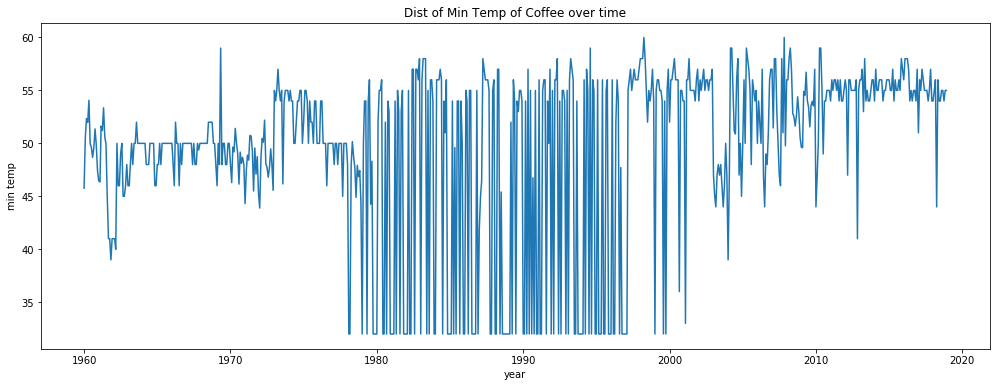

In [55]:
plt.figure(figsize=(17,6))
plt.plot(narino.min_temp)
plt.title('Dist of Min Temp of Coffee over time')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

- Takeaways: There is a chunk of lows bewteen 1978ish - 2000ish. The temperature appears to stay pretty stable aside from the chunk in the middle.
- To Do: Narrow in on the chunks of lows to see what that looks like.

#### Looking at average temperature over time in Narino

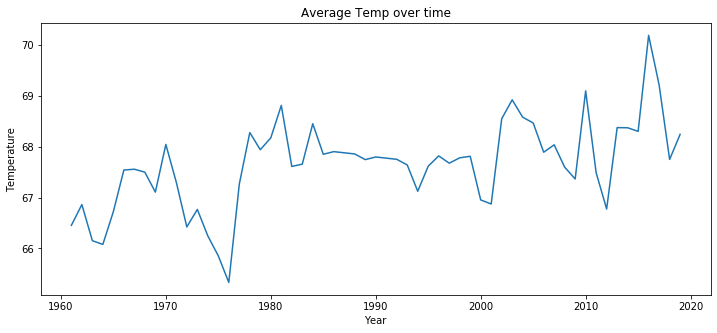

In [56]:
plt.figure(figsize=(12,5))
plt.plot(narino.mean_temp.resample("Y").mean())
plt.title('Average Temp over time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

- Takeaways: The average temperature over time appears to be pretty consistant, with the odd spike and dip in the data. 
- To Do: Narrow in on any change that seems to be radical

#### Quantity will be the same for all regions

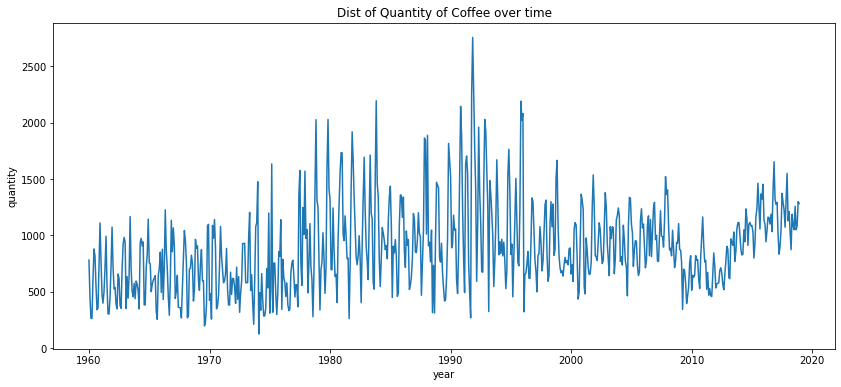

In [57]:
plt.figure(figsize=(14,6))
plt.plot(narino.quantity)
plt.title('Dist of Quantity of Coffee over time')
plt.xlabel('year')
plt.ylabel('quantity')
plt.show()

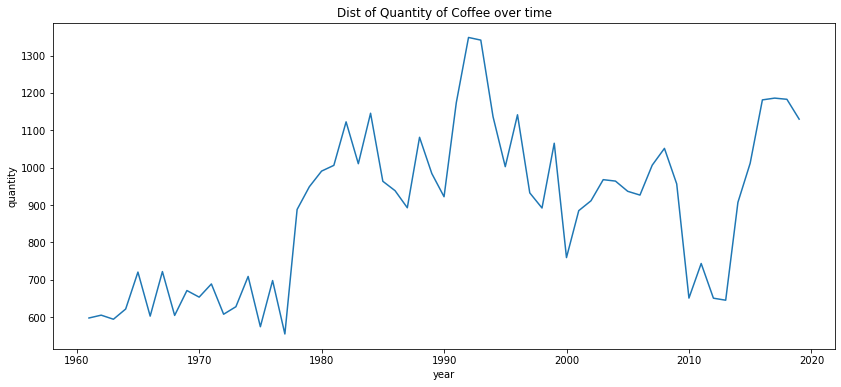

In [58]:
plt.figure(figsize=(14,6))
plt.plot(narino.quantity.resample('Y').mean())
plt.title('Dist of Quantity of Coffee over time')
plt.xlabel('year')
plt.ylabel('quantity')
plt.show()

#### Does price in Narino change from price in other regions?

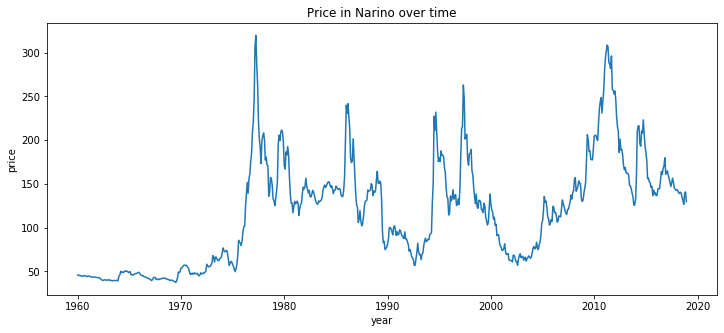

In [60]:
plt.figure(figsize=(12,5))
plt.plot(narino.price)
plt.title('Price in Narino over time')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

- Takeaways: This distribution is the same as the other regions I have looked at. 
- To Do: Put them all side by side, or in a layered chart, to see if there are any differences.

### Valle: Central Zone

In [61]:
precip = round(valle.precip.mean(), 2)
temp = round(valle.mean_temp.mean(), 2)
maxtemp = round(valle.mean_temp.max(), 2)
mintemp = round(valle.min_temp.mean(), 2)
price = round(valle.price.mean(), 2)
quantity = round(valle.quantity.mean(), 2)

print(f'The average precipitation in Valle is: {precip} cm.')
print(f'The average temperature in Valle is: {temp} F.')
print(f'The maximum temperature in Valle (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Valle is: {mintemp} F.')
print(f'The average inflated price in Valle is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Valle is: 0.3 cm.
The average temperature in Valle is: 82.5 F.
The maximum temperature in Valle (based on average temp) is: 87.71 F.
The minimum temperature in Valle is: 70.8 F.
The average inflated price in Valle is: 287.52 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


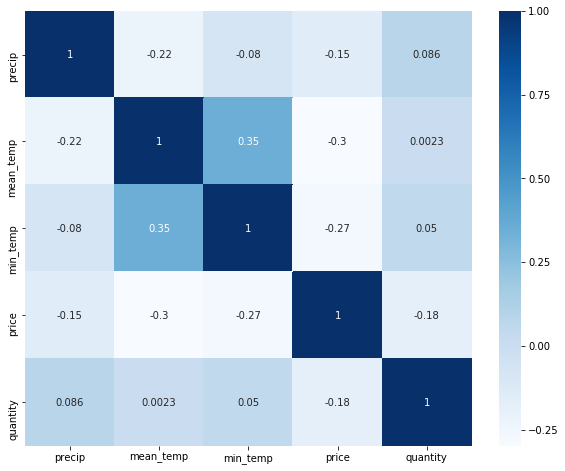

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(valle.corr(), annot=True, cmap='Blues')
plt.show()

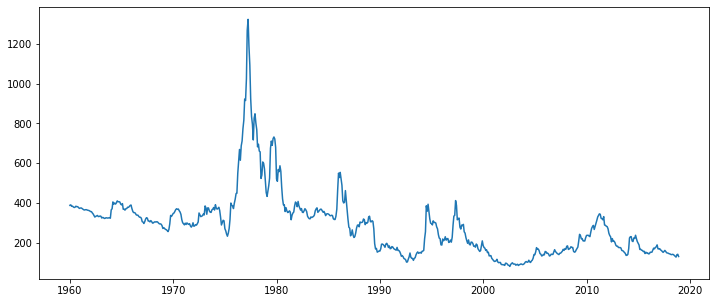

In [63]:
plt.figure(figsize=(12,5))
plt.plot(valle.price)
plt.show()

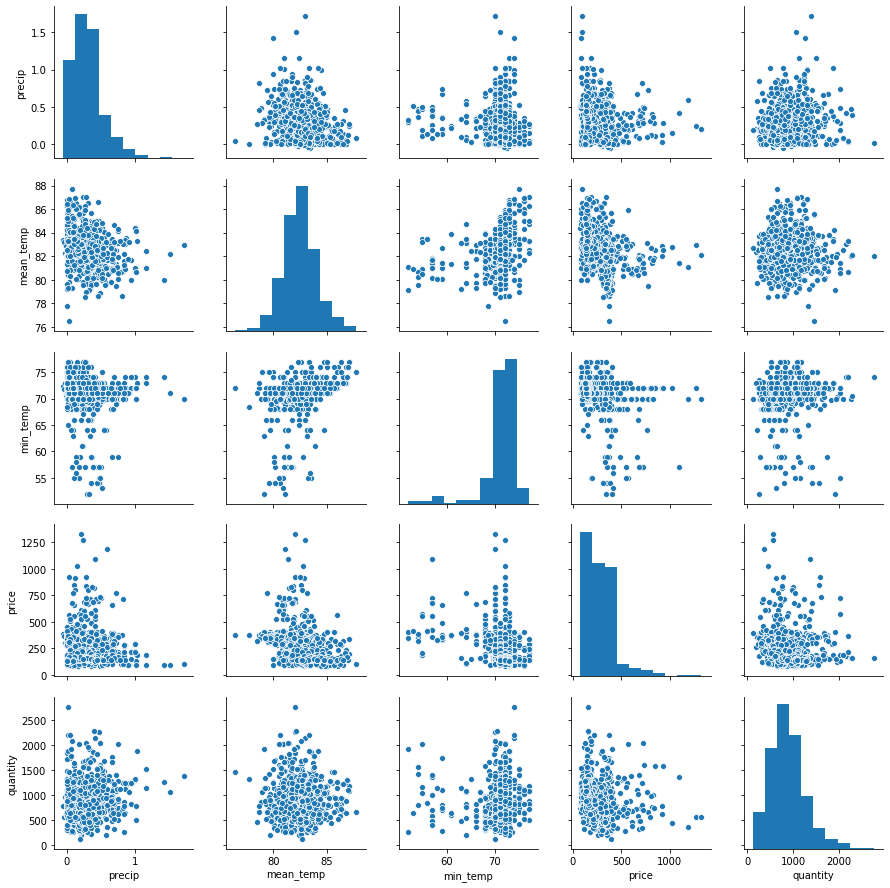

In [64]:
sns.pairplot(valle)
plt.show()

### Average Temp

- Look at the average temperature of each region to see if anything major jumps out.

In [113]:
def show_mean_temp():
    sns.scatterplot(huila.mean_temp, huila.price)
    plt.title('Huila: South Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(cauca.mean_temp, cauca.price)
    plt.title('Cauca: South Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(narino.mean_temp, narino.price)
    plt.title('Narino: South Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(caldas.mean_temp, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(risaralda.mean_temp, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(antioquia.mean_temp, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(quindio.mean_temp, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(tolima.min_temp, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(valle.mean_temp, valle.price)
    plt.title('Valle: Central Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(cesar.mean_temp, cesar.price)
    plt.title('Cesar: North Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(magdalena.mean_temp, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(santander.mean_temp, santander.price)
    plt.title("Santander: East Zone")
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(cundinamarca.mean_temp, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.xlabel('Average Temperature')
    plt.ylabel('Price')
    plt.show()
    

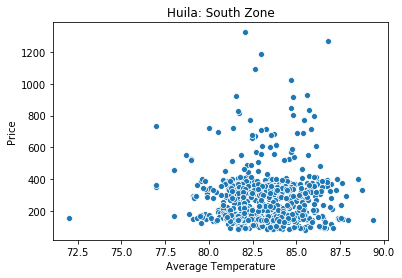

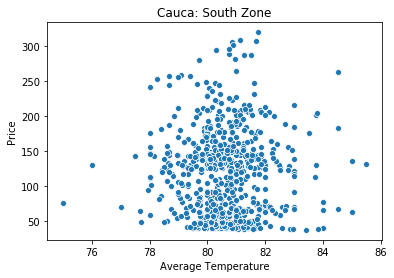

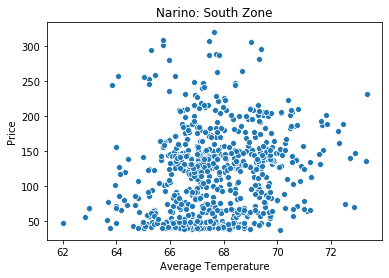

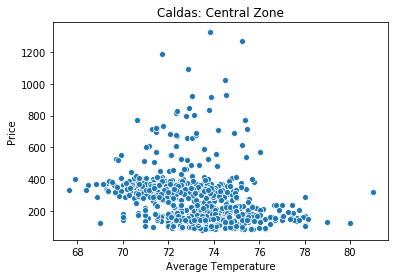

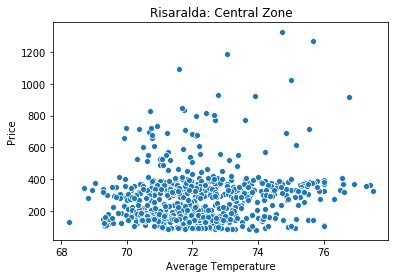

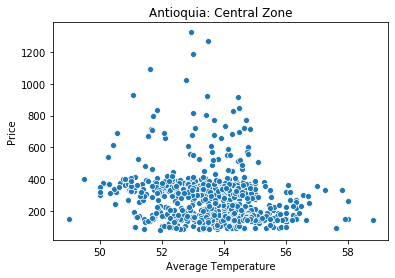

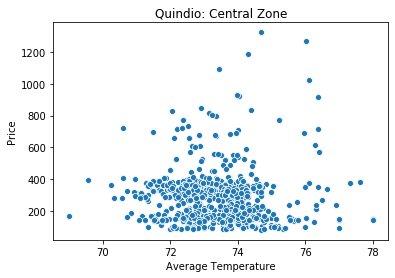

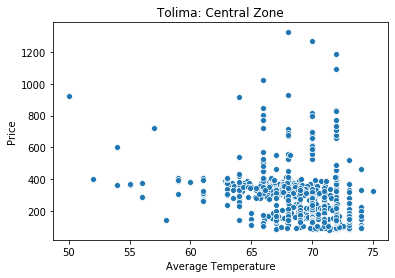

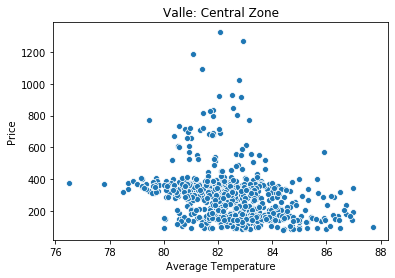

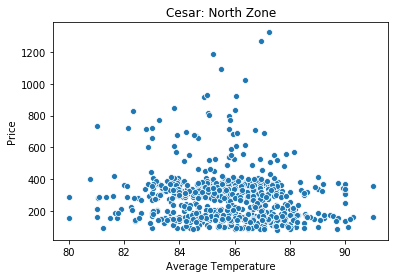

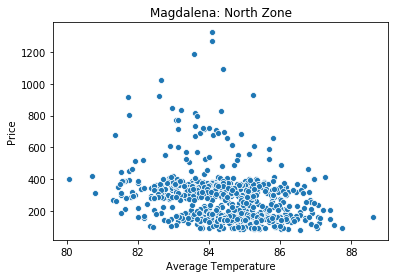

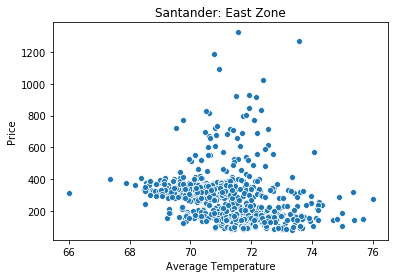

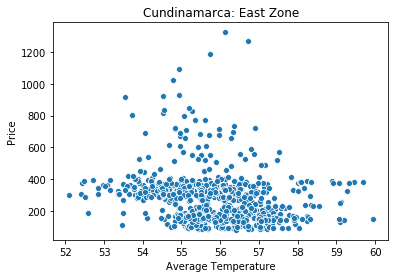

In [114]:
show_mean_temp()

In [223]:
def corr_price_and_temp(df):
    columns = [col for col in df.columns if col.endswith('mean_temp')]
    for column in columns:
        sns.scatterplot(df[column], df.price)
        plt.title('Price vs Average Temperature')
        plt.ylabel('Price')
        plt.show()

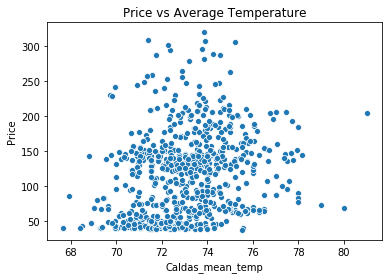

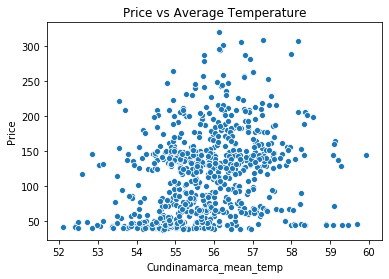

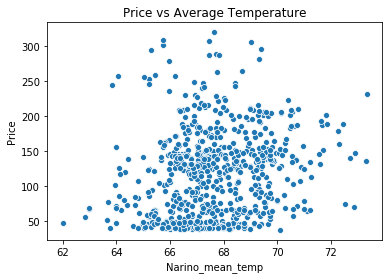

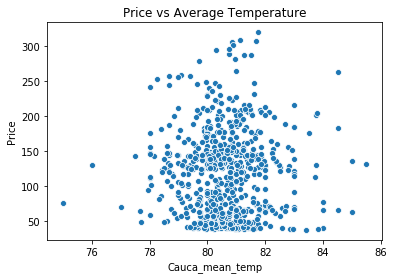

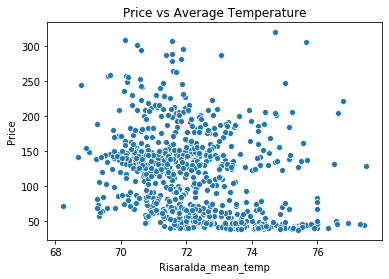

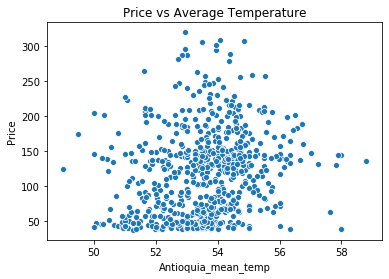

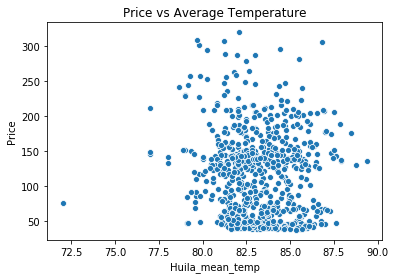

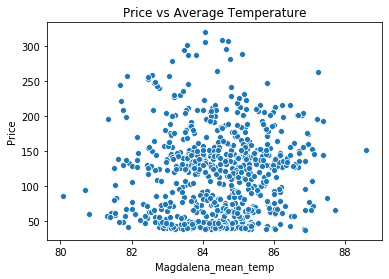

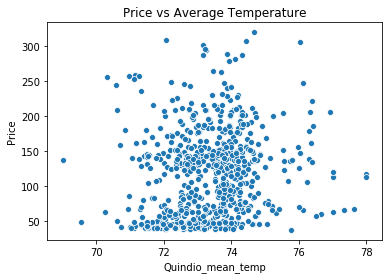

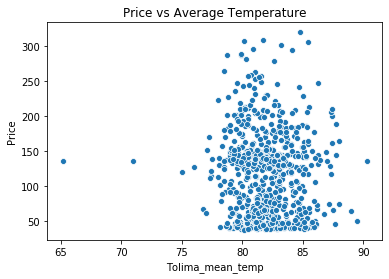

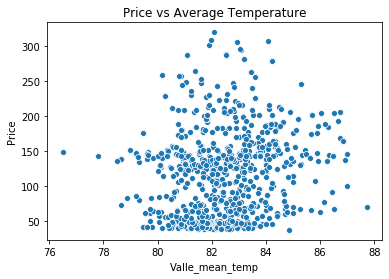

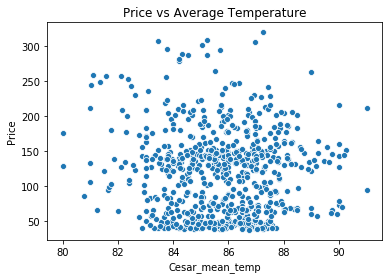

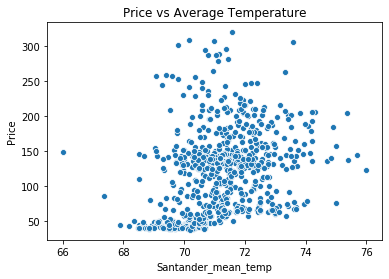

In [224]:
corr_price_and_temp(df)

- Takeaways: The average temperatures in each region vary slightly according to location. 
    - The regions in the south zone have an average temperature of around 80 degrees with average prices hovering around 400 USD.
    - The central zone regions have an average temperature of around 70 degrees and have more data points hovering around 400 USD.
    - The north zone is averaging around 80 degrees with the same mean price of about 400 USD.
    - the east zone has two different averages, together being around 60 degrees. The average price is just above 400 USD.
- To Do: Look into anomalous data points to see what are potential causes of highs.

### Min Temp
- Look at the min temperature of each region to see if anything sticks out.

In [68]:
def show_min_temp():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.min_temp, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.min_temp, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.min_temp, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.min_temp, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.min_temp, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.min_temp, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.min_temp, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.min_temp, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.min_temp, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.min_temp, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.min_temp, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.min_temp, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.min_temp, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

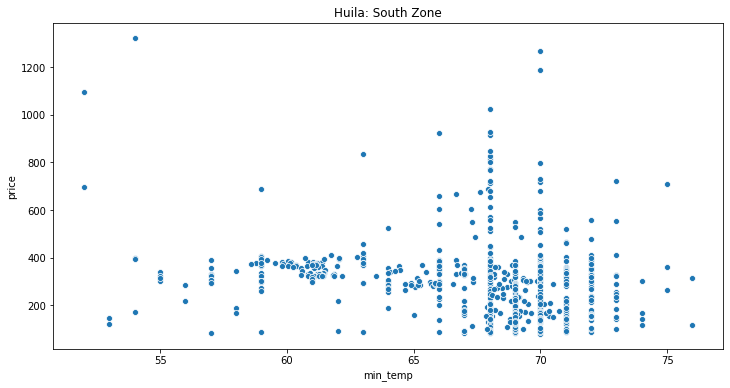

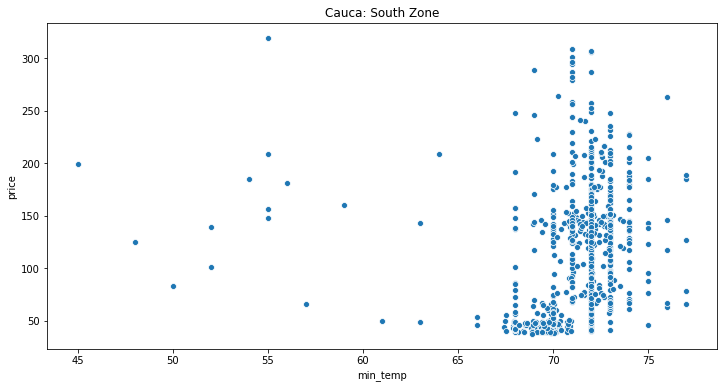

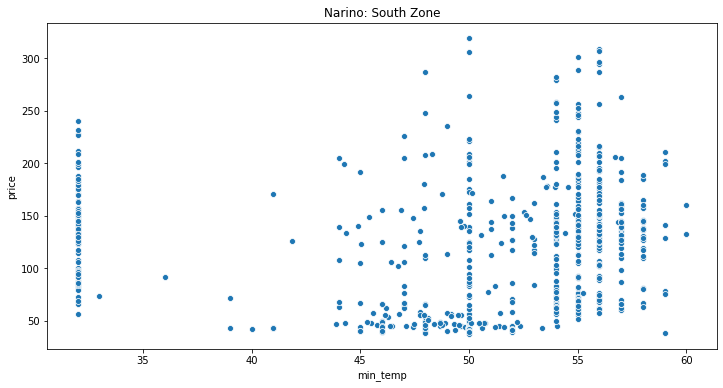

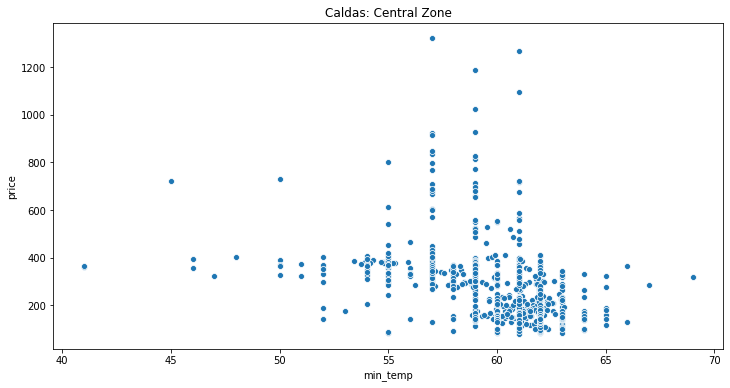

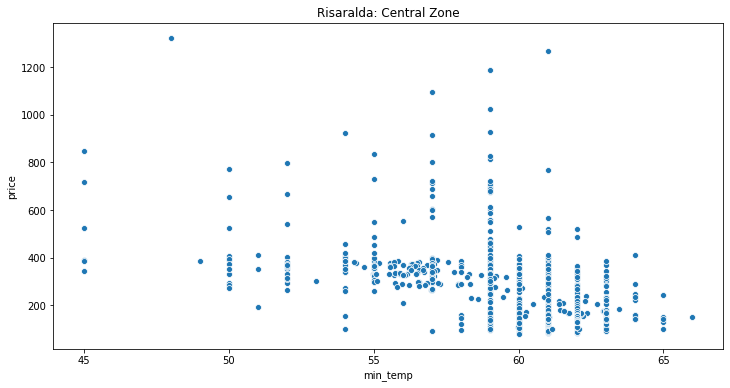

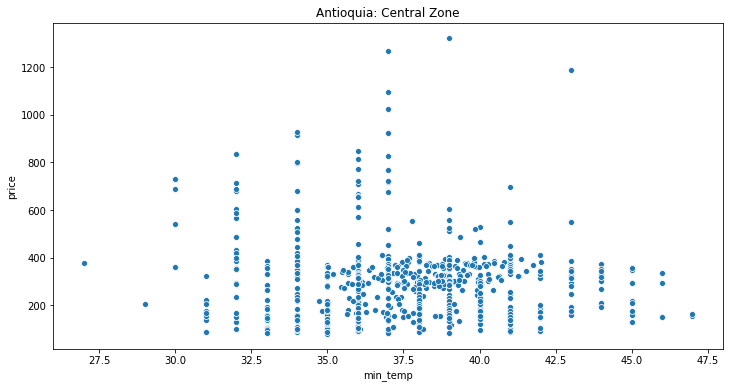

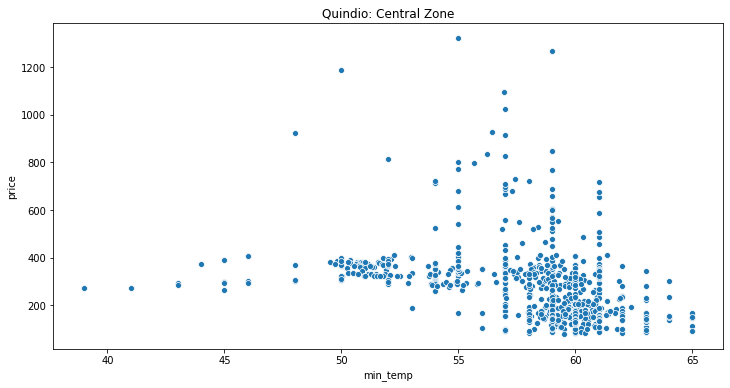

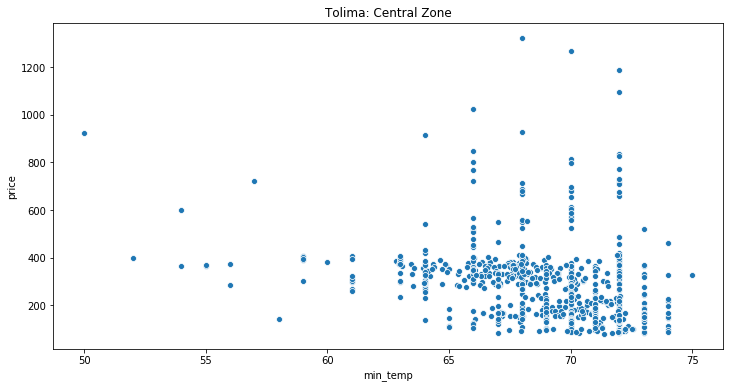

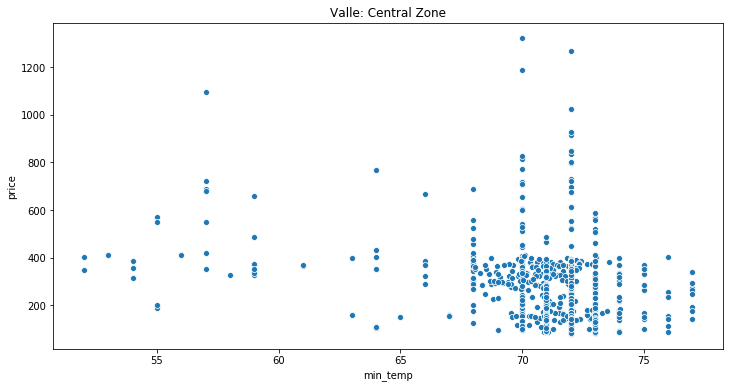

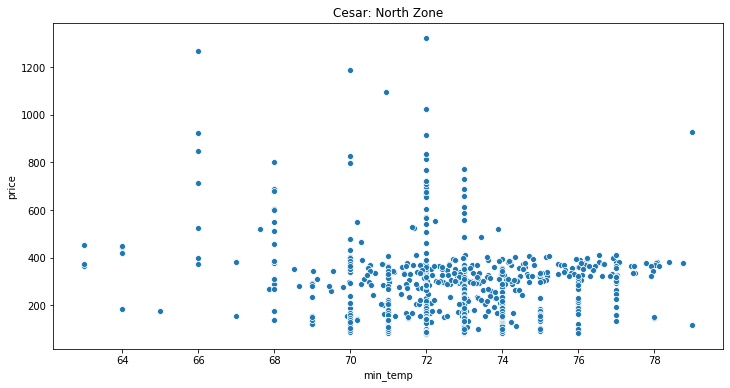

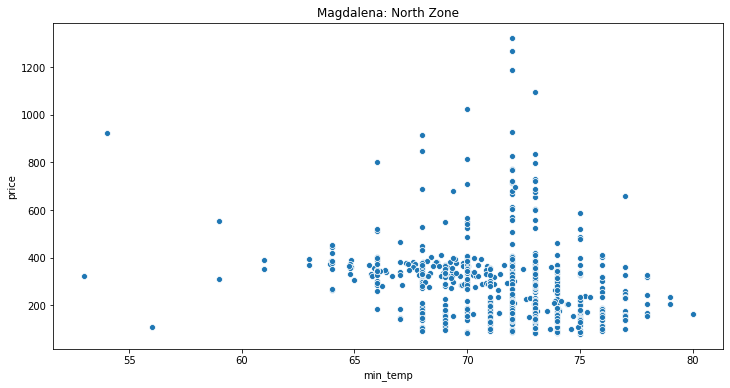

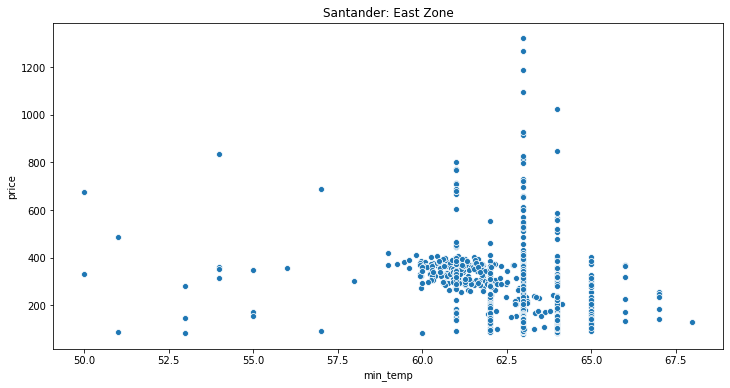

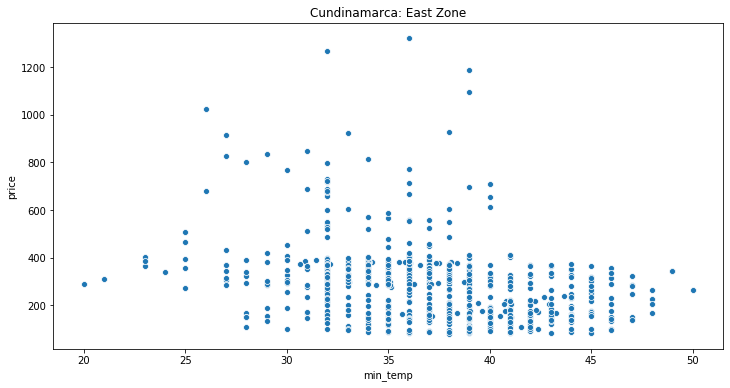

In [69]:
show_min_temp()

In [228]:
def corr_price_and_min_temp(df):
    columns = [col for col in df.columns if col.endswith('min_temp')]
    for column in columns:
        sns.scatterplot(df[column], df.price)
        plt.title('Price vs Minimum Temperature')
        plt.ylabel('Price')
        plt.show()

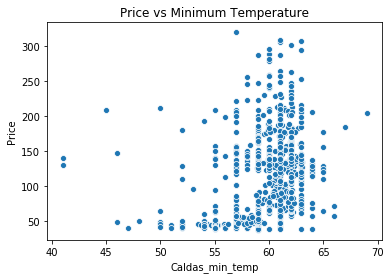

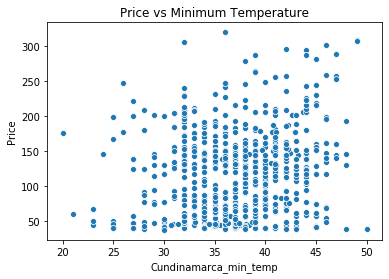

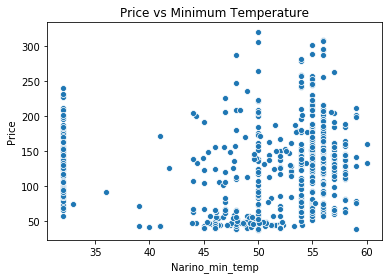

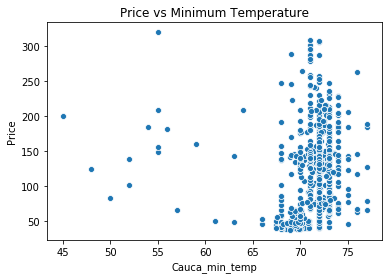

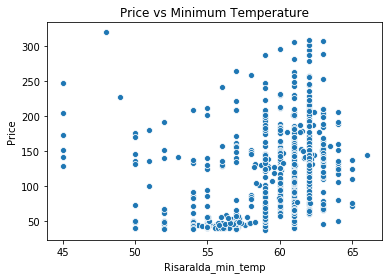

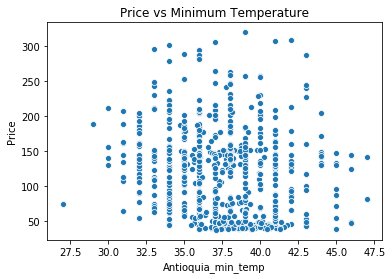

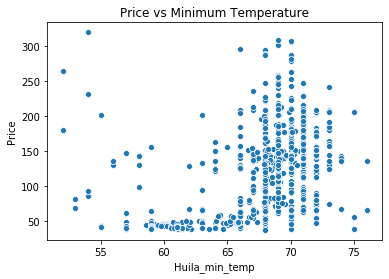

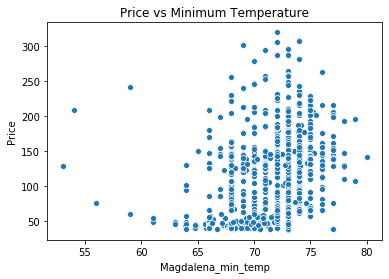

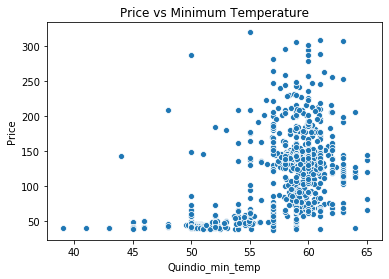

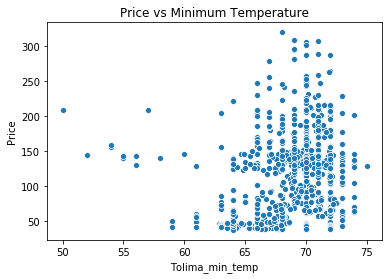

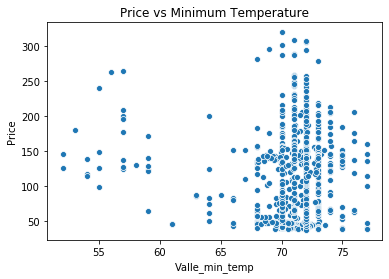

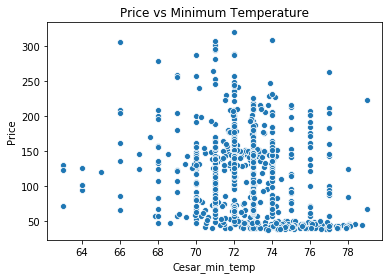

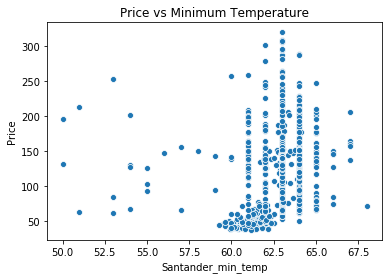

In [229]:
corr_price_and_min_temp(df)

- Takeaways: There are small clusters in the data, but most points are either one of two things; random or in vertical lines. 
- To Do: Better understand how to interpret plots like these ones.

### Average Precipitation
- Does anything abnormal happen in any one region in regards to precipitation?

In [70]:
def precip():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.precip, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.precip, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.precip, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.precip, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.precip, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.precip, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.precip, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.precip, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.precip, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.precip, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.precip, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.precip, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.precip, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

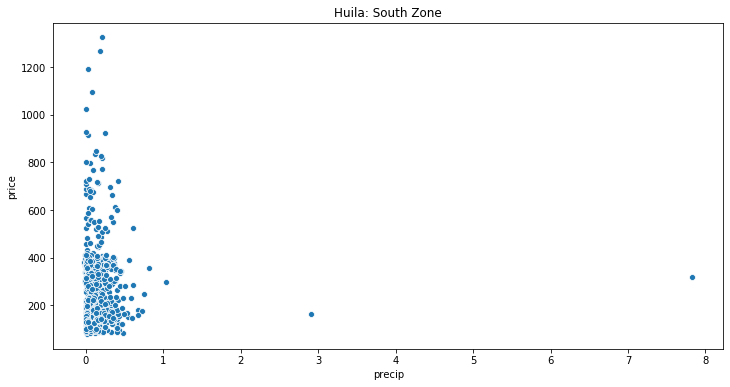

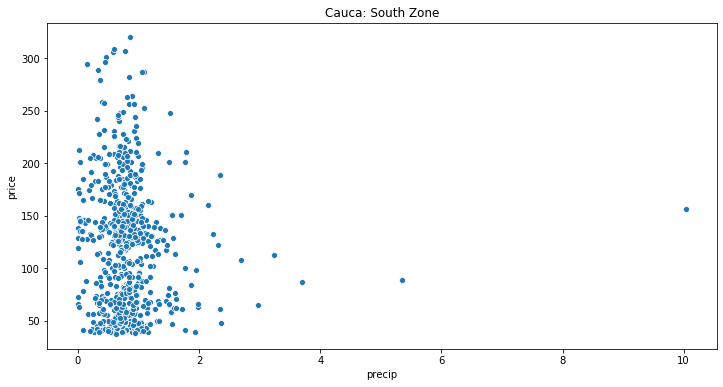

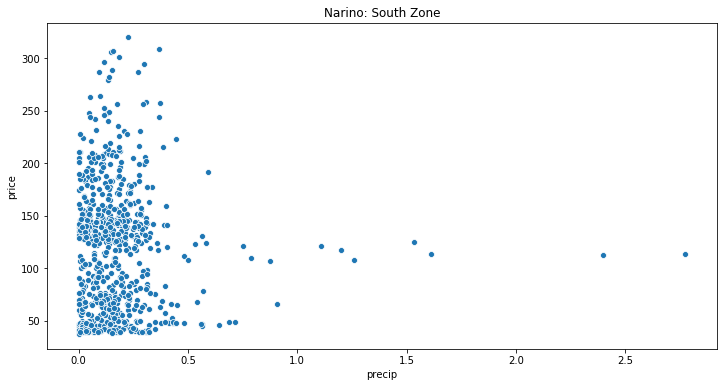

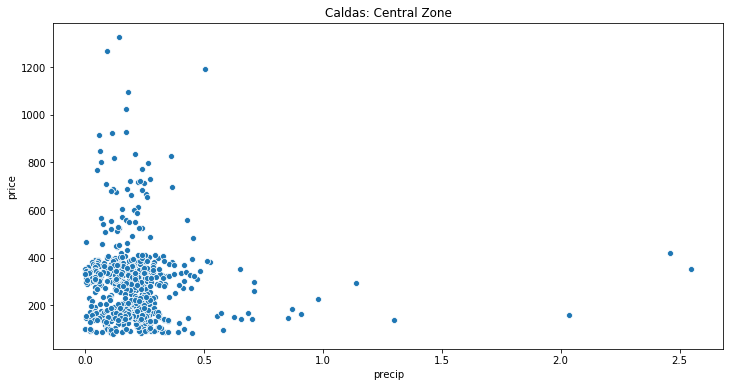

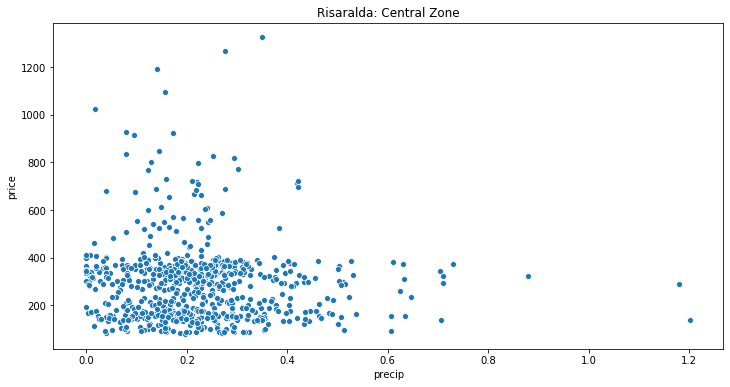

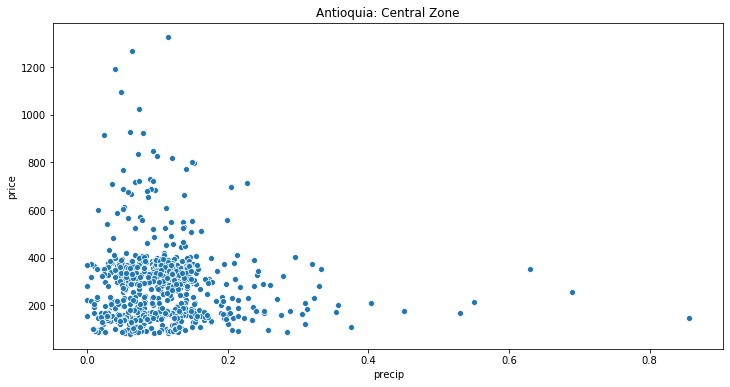

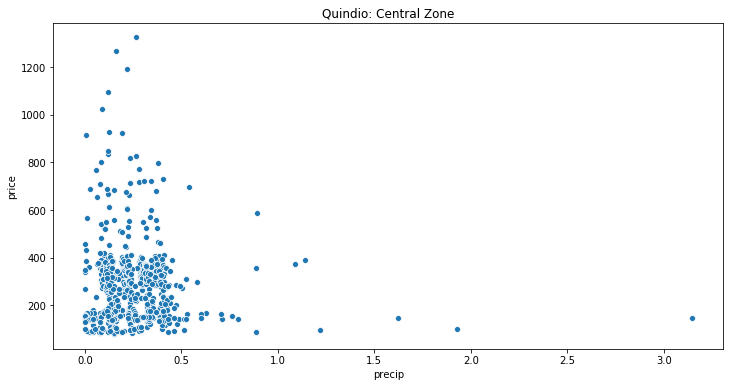

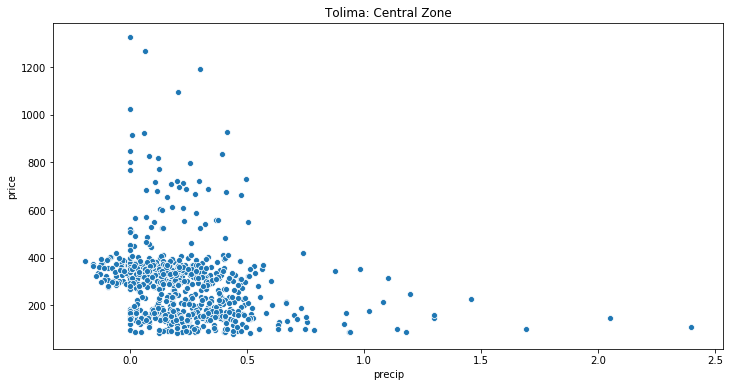

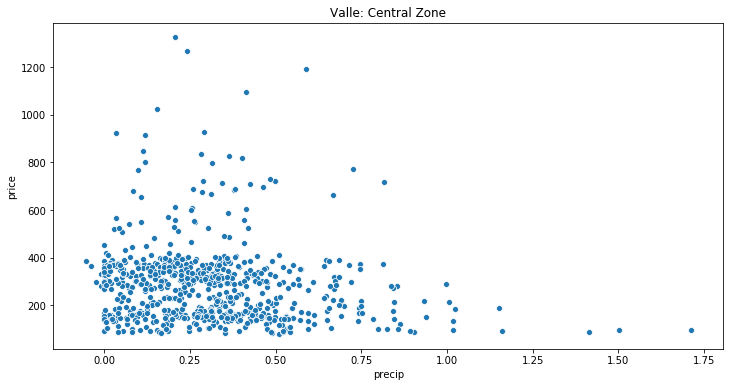

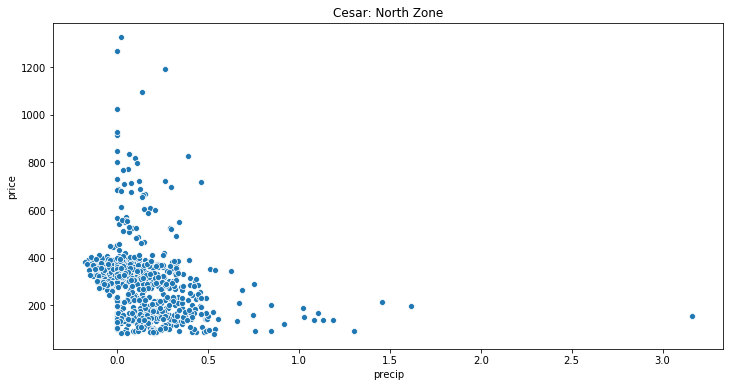

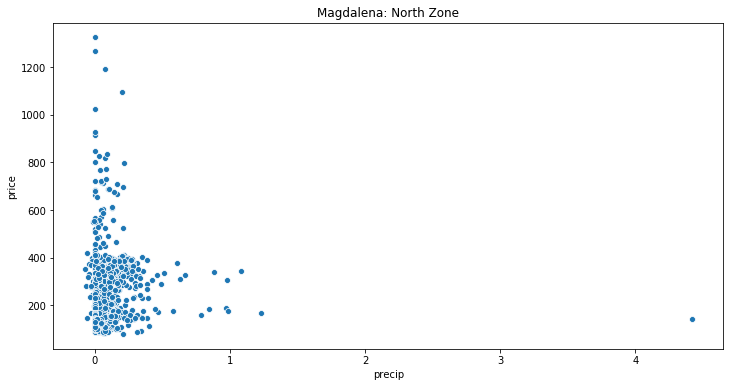

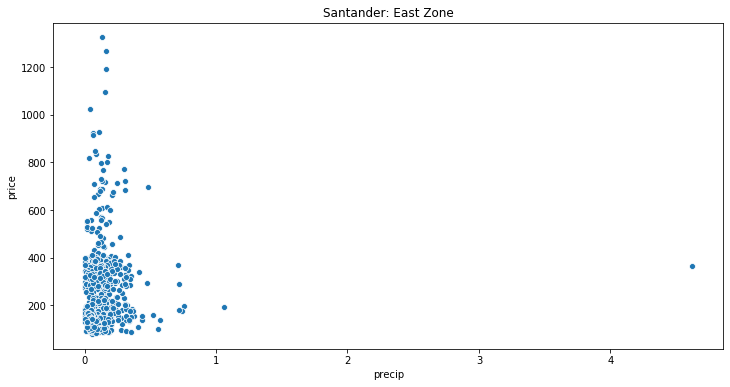

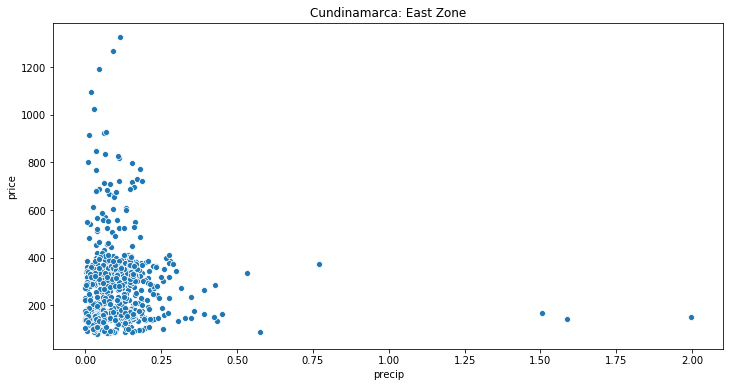

In [71]:
precip()

In [236]:
def corr_price_and_precip(df):
    columns = [col for col in df.columns if col.endswith('precip')]
    for column in columns:
        sns.scatterplot(df[column], df.price)
        plt.title('Price vs Average Precipitation')
        plt.ylabel('Price')
        plt.show()

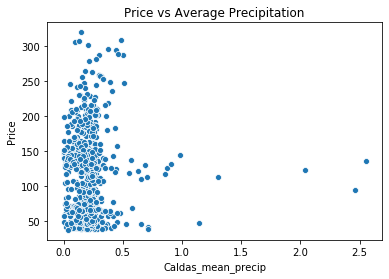

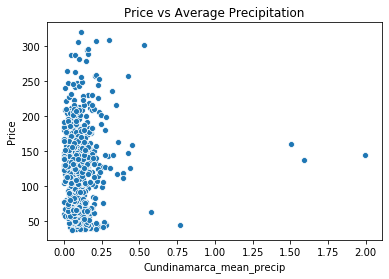

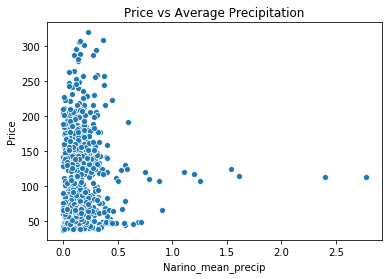

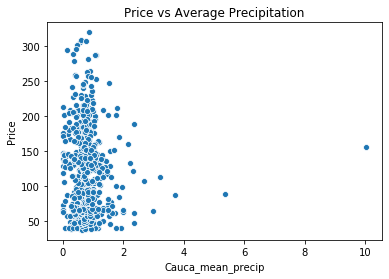

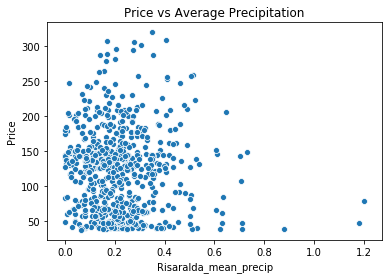

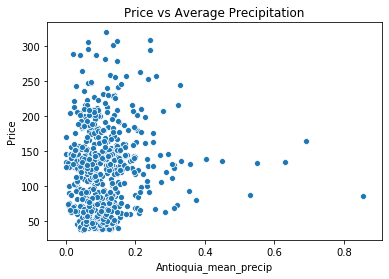

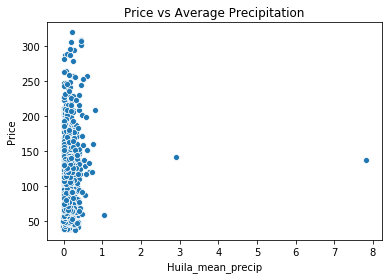

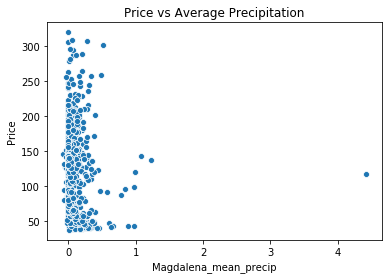

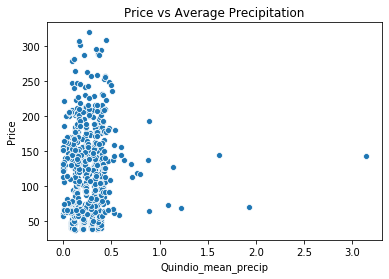

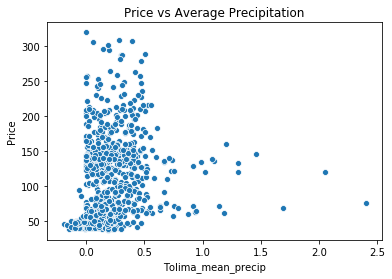

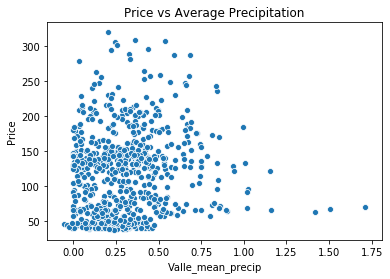

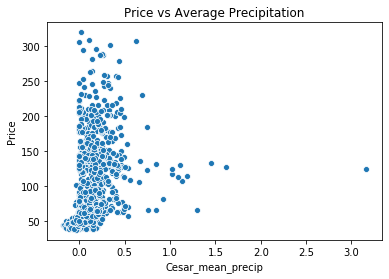

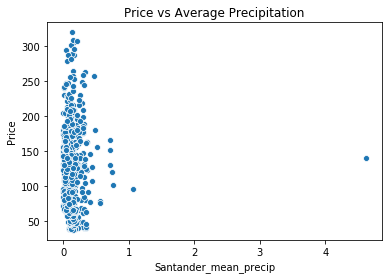

In [237]:
corr_price_and_precip(df)

- Takeaways: You can see the difference in precipitaion in each region, but no real correlation with price. This could be because of what region is being looked might not have as much precipitation going on. There are a few anomalous points of precipitation with average price. 
- To Do: Narrow in on these anomalous points to see what is happening in the data.

### Quantity Sold
- How does the quantity of coffee relate to price of coffee?

In [144]:
def quantity():
    sns.scatterplot(huila.quantity, huila.price)
    plt.title('Huila: South Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(cauca.quantity, cauca.price)
    plt.title('Cauca: South Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

    sns.scatterplot(narino.quantity, narino.price)
    plt.title('Narino: South Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(caldas.quantity, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(risaralda.quantity, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(antioquia.quantity, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(quindio.quantity, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(tolima.quantity, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')   
    plt.show()

    sns.scatterplot(valle.quantity, valle.price)
    plt.title('Valle: Central Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(cesar.quantity, cesar.price)
    plt.title('Cesar: North Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(magdalena.quantity, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(santander.quantity, santander.price)
    plt.title("Santander: East Zone")
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()

    sns.scatterplot(cundinamarca.quantity, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.xlabel('Quantity')
    plt.ylabel('Price')    
    plt.show()
    

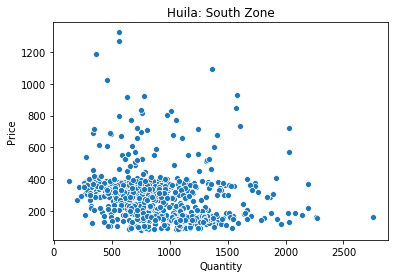

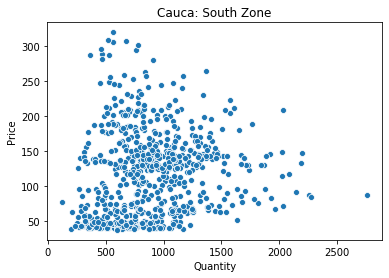

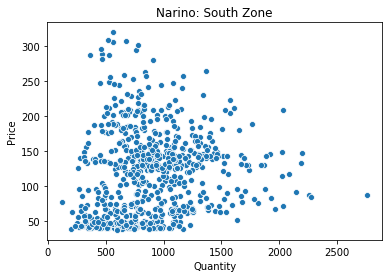

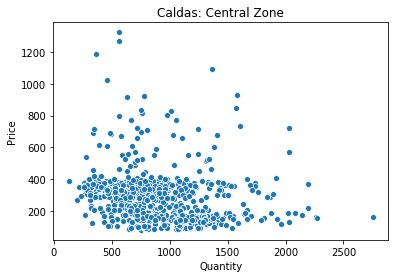

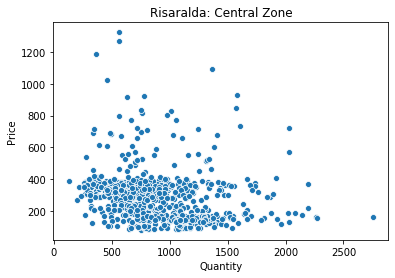

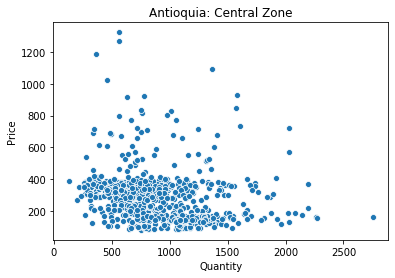

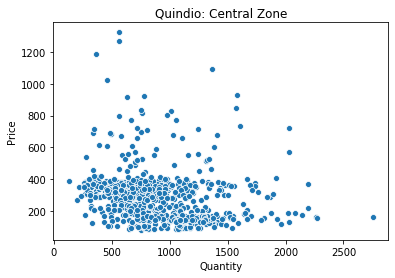

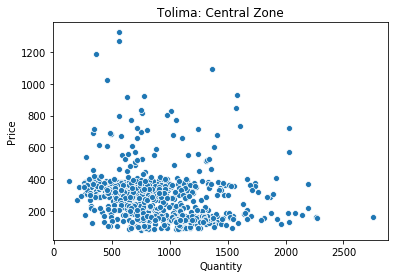

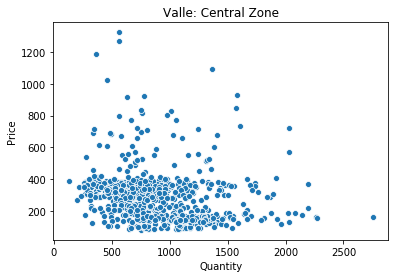

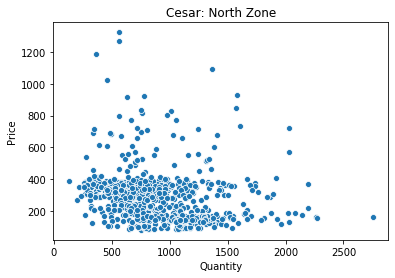

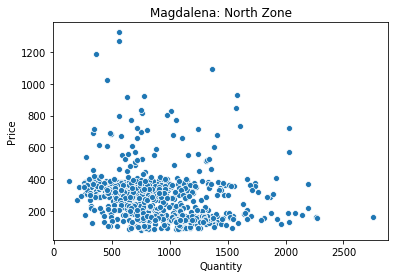

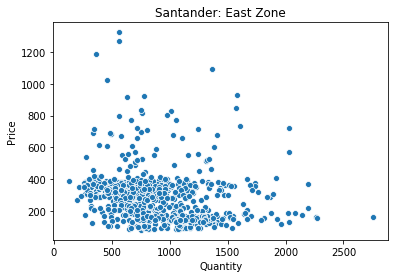

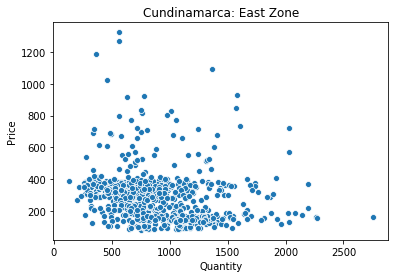

In [145]:
# Does quantity correlate with coffee prices?
quantity()

In [136]:
def quantity_lines():
    plt.plot(huila.quantity.resample('Y').mean())
    plt.title('Huila: South Zone')
    plt.show()

    plt.plot(cauca.quantity.resample('Y').mean())
    plt.title('Cauca: South Zone')
    plt.show()

    plt.plot(narino.quantity.resample('Y').mean())
    plt.title('Narino: South Zone')
    plt.show()

    plt.plot(caldas.quantity.resample('Y').mean())
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.plot(risaralda.quantity.resample('Y').mean())
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.plot(antioquia.quantity.resample('Y').mean())
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.plot(quindio.quantity.resample('Y').mean())
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.plot(tolima.quantity.resample('Y').mean())
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.plot(valle.quantity.resample('Y').mean())
    plt.title('Valle: Central Zone')
    plt.show()

    plt.plot(cesar.quantity.resample('Y').mean())
    plt.title('Cesar: North Zone')
    plt.show()

    plt.plot(magdalena.quantity.resample('Y').mean())
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.plot(santander.quantity.resample('Y').mean())
    plt.title("Santander: East Zone")
    plt.show()

    plt.plot(cundinamarca.quantity.resample('Y').mean())
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

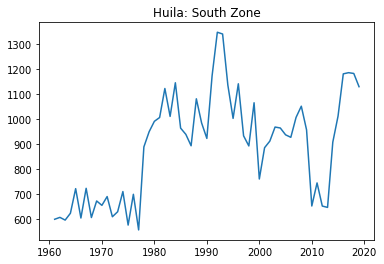

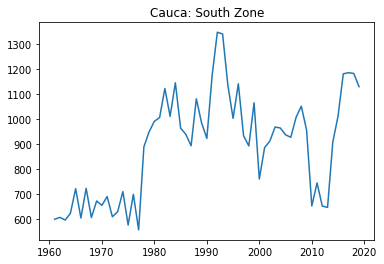

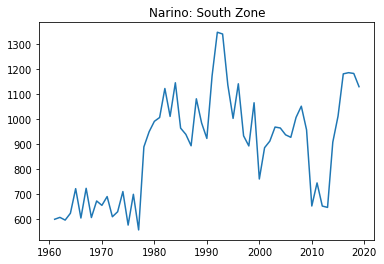

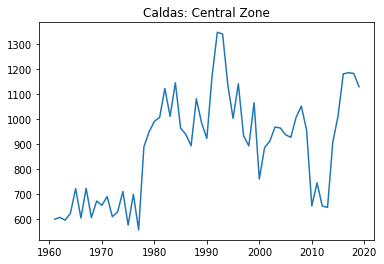

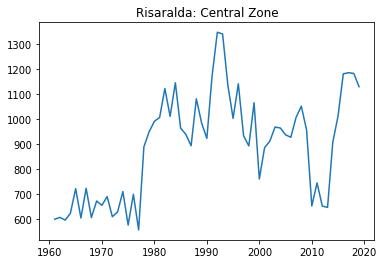

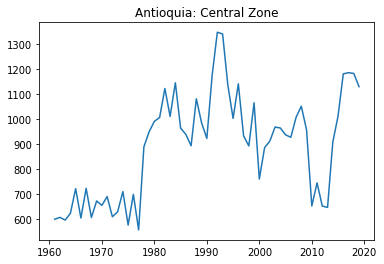

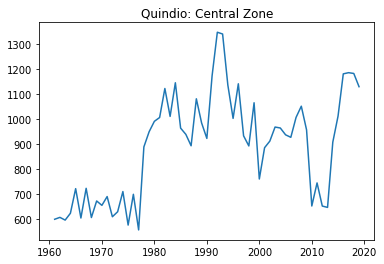

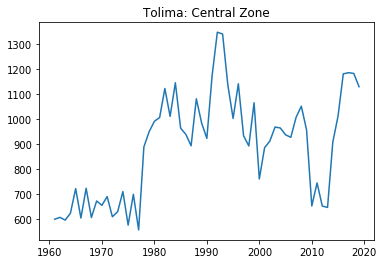

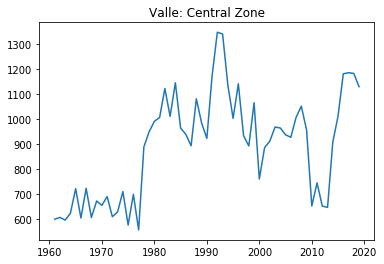

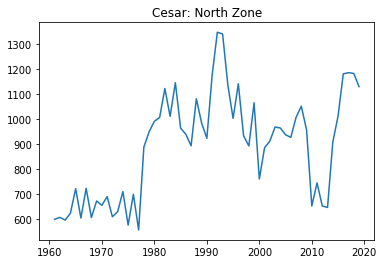

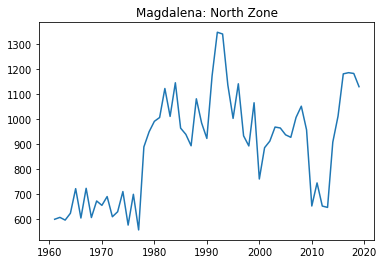

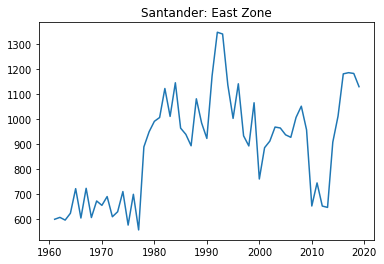

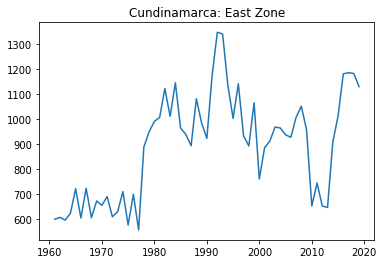

In [137]:
quantity_lines()

In [238]:
# Same quantity for each region

In [75]:
# Thoughts 
# create boxplot with other data

### Price
- Look at the overall distribution of price throughout our timeline

In [119]:
def show_price():
    plt.plot(huila.price)
    plt.title('Huila: South Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(cauca.price)
    plt.title('Cauca: South Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(narino.price)
    plt.title('Narino: South Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(caldas.price)
    plt.title("Caldas: Central Zone")
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(quindio.price)
    plt.title('Quindio: Central Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(tolima.price)
    plt.title('Tolima: Central Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(valle.price)
    plt.title('Valle: Central Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(cesar.price)
    plt.title('Cesar: North Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(santander.price)
    plt.title("Santander: East Zone")
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    plt.plot(cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
    

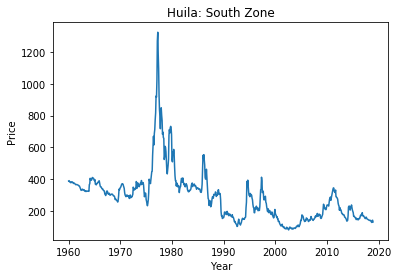

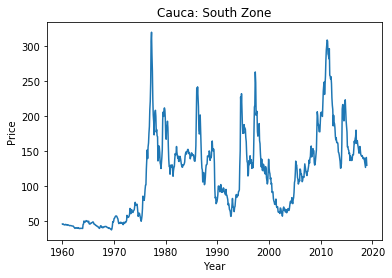

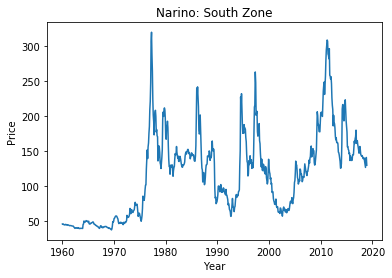

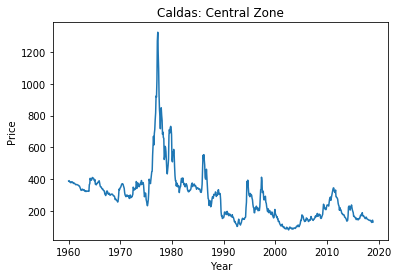

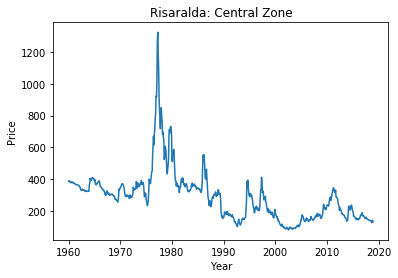

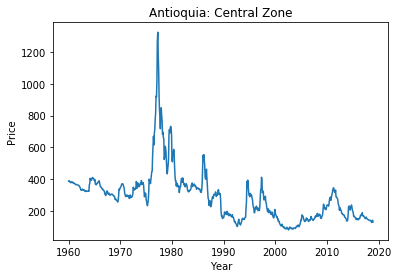

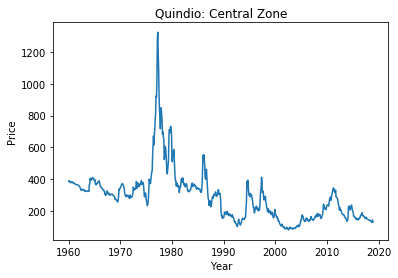

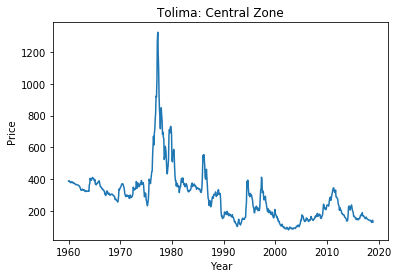

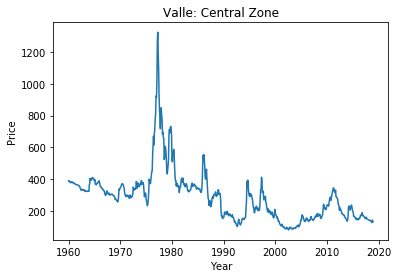

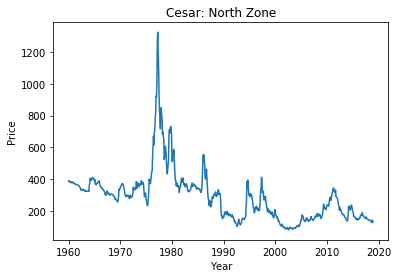

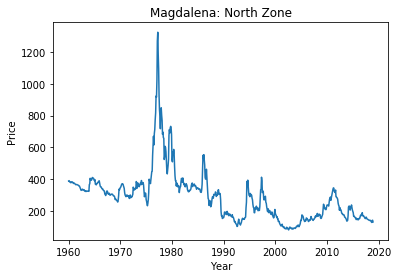

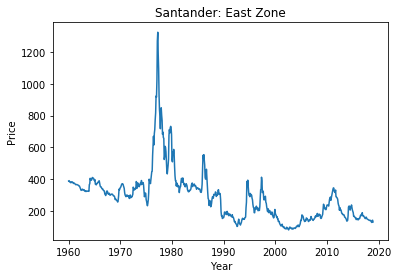

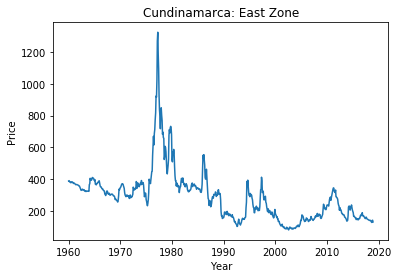

In [120]:
# Look at price distributions
show_price()

In [78]:
# thoughts: There is a difference in distribution two graphs, Cauca and narino
# Look into those closer 

#### How does the delta in temperatures relate to price?

In [240]:
df.head()

quantity  price    inflated  Caldas_mean_precip  Caldas_mean_temp  \
date                                                                            
1960-01-01     782.0  45.68  387.519181            0.040000         72.500000   
1960-02-01     449.0  45.95  389.809684            0.040000         72.210526   
1960-03-01     266.0  45.10  382.598841            0.143158         71.875000   
1960-04-01     264.0  45.20  383.447176            0.525000         72.687500   
1960-05-01     602.0  44.73  379.460004            0.191000         72.181818   

            Caldas_min_temp  Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                                            
1960-01-01        53.446162                  0.280000               58.250000   
1960-02-01        54.300065                  0.082857               58.894737   
1960-03-01        54.741925                  0.124545               58.347826   
1960-04-01        55.906027                  0.113750               59.687500   
1960-05-01        55.326548                  0.276555               59.458333   

            Cundinamarca_min_temp  Narino_mean_precip  ...  Tolima_min_temp  \
date                                                   ...                    
1960-01-01              30.875838            0.072655  ...        62.826583   
1960-02-01              31.438934            0.015172  ...        64.635809   
1960-03-01              34.199076            0.012903  ...        66.368796   
1960-04-01              38.081443            0.008000  ...        67.912503   
1960-05-01              38.367067            0.016774  ...        67.875379   

            Valle_mean_precip  Valle_mean_temp  Valle_min_temp  \
date                                                             
1960-01-01          -0.054432        83.394728       72.399317   
1960-02-01           0.021487        83.592275       72.199709   
1960-03-01           0.061226        83.154188       73.557848   
1960-04-01           0.204186        82.330770       71.204803   
1960-05-01           0.195359        81.782540       70.861052   

            Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
date                                                             
1960-01-01           0.119673        85.574639       74.166190   
1960-02-01          -0.160911        86.849857       76.056101   
1960-03-01          -0.178350        87.567455       76.982745   
1960-04-01          -0.095321        87.131671       78.062566   
1960-05-01           0.042621        85.752403       78.742579   

            Santander_mean_precip  Santander_mean_temp  Santander_min_temp  
date                                                                        
1960-01-01               0.111732            69.105673           59.956370  
1960-02-01               0.167760            69.504415           60.659367  
1960-03-01               0.154044            69.713106           61.178475  
1960-04-01               0.203308            69.024617           61.300378  
1960-05-01               0.150532            69.160477           60.614402  

[5 rows x 42 columns]

In [241]:
df1 = df.drop(columns=(['price', 'quantity']))

In [242]:
df1.head(3)

inflated  Caldas_mean_precip  Caldas_mean_temp  Caldas_min_temp  \
date                                                                            
1960-01-01  387.519181            0.040000         72.500000        53.446162   
1960-02-01  389.809684            0.040000         72.210526        54.300065   
1960-03-01  382.598841            0.143158         71.875000        54.741925   

            Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                           
1960-01-01                  0.280000               58.250000   
1960-02-01                  0.082857               58.894737   
1960-03-01                  0.124545               58.347826   

            Cundinamarca_min_temp  Narino_mean_precip  Narino_mean_temp  \
date                                                                      
1960-01-01              30.875838            0.072655         65.709097   
1960-02-01              31.438934            0.015172         65.148039   
1960-03-01              34.199076            0.012903         66.165378   

            Narino_min_temp  ...  Tolima_min_temp  Valle_mean_precip  \
date                         ...                                       
1960-01-01        45.765823  ...        62.826583          -0.054432   
1960-02-01        50.533429  ...        64.635809           0.021487   
1960-03-01        52.328187  ...        66.368796           0.061226   

            Valle_mean_temp  Valle_min_temp  Cesar_mean_precip  \
date                                                             
1960-01-01        83.394728       72.399317           0.119673   
1960-02-01        83.592275       72.199709          -0.160911   
1960-03-01        83.154188       73.557848          -0.178350   

            Cesar_mean_temp  Cesar_min_temp  Santander_mean_precip  \
date                                                                 
1960-01-01        85.574639       74.166190               0.111732   
1960-02-01        86.849857       76.056101               0.167760   
1960-03-01        87.567455       76.982745               0.154044   

            Santander_mean_temp  Santander_min_temp  
date                                                 
1960-01-01            69.105673           59.956370  
1960-02-01            69.504415           60.659367  
1960-03-01            69.713106           61.178475  

[3 rows x 40 columns]

In [243]:
df1['max_temp'] = ((df1.Caldas_mean_temp.max() + df1.Narino_mean_temp.max() + 
                    df1.Antioquia_mean_temp.max() + df1.Cauca_mean_temp.max() + 
                    df1.Quindio_mean_temp.max() + df1.Magdalena_mean_temp.max() +
                    df1.Huila_mean_temp.max() + df1.Risaralda_mean_temp.max() + 
                    df1.Tolima_mean_temp.max() + df1.Santander_mean_temp.max() +
                    df1.Cesar_mean_temp.max() + df1.Valle_mean_temp.max() + df1.Cundinamarca_mean_temp.max()) / 13)

In [244]:
df1.head(1)

inflated  Caldas_mean_precip  Caldas_mean_temp  Caldas_min_temp  \
date                                                                            
1960-01-01  387.519181                0.04              72.5        53.446162   

            Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                           
1960-01-01                      0.28                   58.25   

            Cundinamarca_min_temp  Narino_mean_precip  Narino_mean_temp  \
date                                                                      
1960-01-01              30.875838            0.072655         65.709097   

            Narino_min_temp  ...  Valle_mean_precip  Valle_mean_temp  \
date                         ...                                       
1960-01-01        45.765823  ...          -0.054432        83.394728   

            Valle_min_temp  Cesar_mean_precip  Cesar_mean_temp  \
date                                                             
1960-01-01       72.399317           0.119673        85.574639   

            Cesar_min_temp  Santander_mean_precip  Santander_mean_temp  \
date                                                                     
1960-01-01        74.16619               0.111732            69.105673   

            Santander_min_temp   max_temp  
date                                       
1960-01-01            59.95637  79.772741  

[1 rows x 41 columns]

In [245]:
df1['min_temp'] = ((df1.Caldas_min_temp + df1.Narino_min_temp + 
                    df1.Antioquia_mean_temp + df1.Cauca_min_temp + 
                    df1.Quindio_min_temp + df1.Magdalena_min_temp +
                    df1.Huila_min_temp + df1.Risaralda_min_temp + 
                    df1.Tolima_min_temp + df1.Santander_min_temp +
                    df1.Cesar_min_temp + df1.Valle_min_temp + df1.Cundinamarca_min_temp) / 13)

In [246]:
df1.head(1)

inflated  Caldas_mean_precip  Caldas_mean_temp  Caldas_min_temp  \
date                                                                            
1960-01-01  387.519181                0.04              72.5        53.446162   

            Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                           
1960-01-01                      0.28                   58.25   

            Cundinamarca_min_temp  Narino_mean_precip  Narino_mean_temp  \
date                                                                      
1960-01-01              30.875838            0.072655         65.709097   

            Narino_min_temp  ...  Valle_mean_temp  Valle_min_temp  \
date                         ...                                    
1960-01-01        45.765823  ...        83.394728       72.399317   

            Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
date                                                             
1960-01-01           0.119673        85.574639        74.16619   

            Santander_mean_precip  Santander_mean_temp  Santander_min_temp  \
date                                                                         
1960-01-01               0.111732            69.105673            59.95637   

             max_temp   min_temp  
date                              
1960-01-01  79.772741  57.803864  

[1 rows x 42 columns]

In [247]:
df1 = df1[['max_temp', 'min_temp']]

In [248]:
df1.head(2)

max_temp   min_temp
date                            
1960-01-01  79.772741  57.803864
1960-02-01  79.772741  58.695773

In [249]:
# get the delta between the max (of the average) temp and the min average temp
df1['delta'] = (df1.max_temp - df1.min_temp)

In [250]:
df1.head(1)

max_temp   min_temp      delta
date                                       
1960-01-01  79.772741  57.803864  21.968878

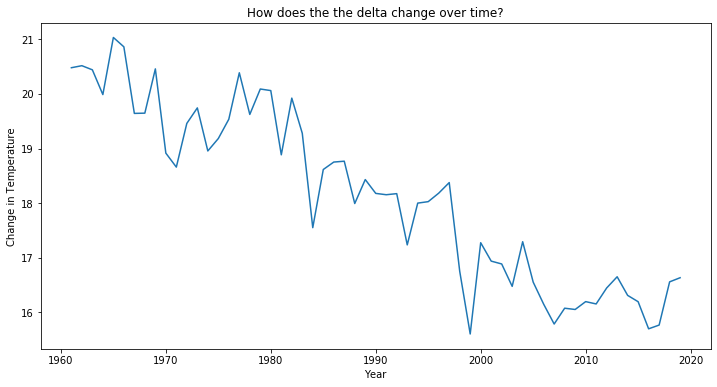

In [251]:
plt.figure(figsize=(12,6))
plt.plot(df1.delta.resample('Y').mean())
plt.title('How does the the delta change over time?')
plt.xlabel('Year')
plt.ylabel('Change in Temperature')
plt.show()

In [91]:
# The average change in temperature over time decreases greatly. 

In [92]:
df1['price'] = df.inflated

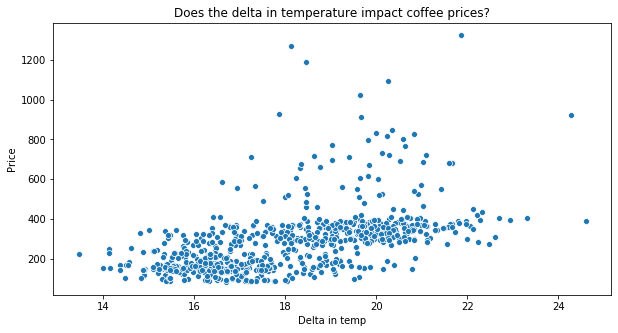

In [93]:
# Look at the delta compared to price
plt.figure(figsize=(10,5))
sns.scatterplot(df1.delta, df1.price)
plt.title('Does the delta in temperature impact coffee prices?')
plt.xlabel('Delta in temp')
plt.ylabel('Price')
plt.show()

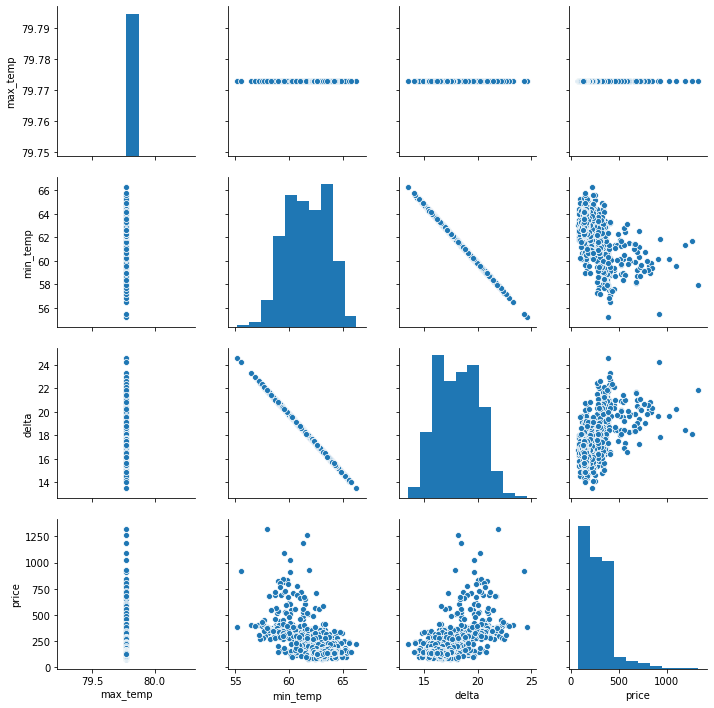

In [94]:
sns.pairplot(df1)
plt.show()

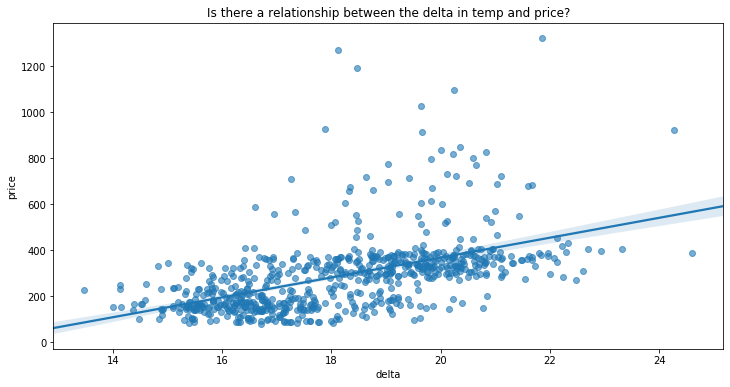

In [95]:
plt.figure(figsize=(12,6))
sns.regplot(df1.delta, df1.price, scatter_kws={'alpha': .6})
plt.title('Is there a relationship between the delta in temp and price?')
plt.show()

## functions for final notebook

In [ ]:
def corr_price_and_temp(df):
    columns = [col for col in df.columns if col.endswith('mean_temp')]
    for column in columns:
        sns.scatterplot(df[column], df.price)
        plt.title('Price vs Average Temperature')
        plt.ylabel('Price')
        plt.show()

In [ ]:
def events_over_time():   
    plt.figure(figsize=(12,6))
    plt.plot(df.inflated)
    date_ = '1975'
    plt.axvline(pd.to_datetime(date_), linewidth=1, color='red')
    datetime = '1979'
    plt.axvline(pd.to_datetime(datetime), linewidth=1, color='red')
    date = '1985'
    plt.axvline(pd.to_datetime(date), linewidth=1, color='red')
    dateevent = '1992'
    plt.axvline(pd.to_datetime(dateevent), linewidth=1, color='red')
    datet = '2014'
    plt.axvline(pd.to_datetime(datet), linewidth=1, color='red')
    plt.title('Top five major events that affected inflation')
    plt.xlabel('Year')
    plt.ylabel('Inflation Price')
    plt.show()